##### Story:

Ein Abteilungsleiter eines Supermarktes hat sich enttäuscht an mich gewendet, nachdem einige gestartete Marketingkampagnen nicht die erhoffte Wirkung und Umsatzsteigerung gebracht haben, die erhofft wurde. Der Leiter hat mir drei Jahre an aufgezeichneten Kundendaten übergeben, die durch verteile Kundenkarten gesammelt wurden, damit ich anhand von den Daten eine Strategie zum Erfolg der nächsten Kampagnen entwickeln kann.

Meine Zielsetzung ist es, eine Kundensegmentierung mit einer Cluster-Analyse durchzuführen, um spezifische Marketingempfehlungen für die entstandenen Segmente abzuleiten. Dies hat den Nutzen, dass der Supermarkt bei einem zukünftigen Kampagnenstart weiß, auf welche Kunden der Blickwinkel gesetzt werden sollte im jeweiligen Segment und somit, welche Kunden gezielt angeworben werden sollten, anstatt allgemein das breite Publikum anzusprechen. Diese zielgerichtete Ansprache soll die Effektivität der Marketingkampagnen erhöhen und zu einer besseren Umsatzsteigerung führen.


##### The Data

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign?resource=download

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering

df = pd.DataFrame()
df = pd.read_csv('marketing_campaign.csv', sep= ';') #Spalten durch Semikolon trennen

In [2]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [3]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
df.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


Tabellarische Darstellung der Features des Datensatzes:

| Attribut | Erläuterung | 
| :----: | :---: | 
|   ID    | Kundenidentifikationsnummer     | 
|  Year_Birth      | Geburtsjahr des Kunden   | 
| Education      |   Bildungsniveau des Kunden    |
| Marital_Status | Beziehungsstatus des Kunden  | 
| Income | Jährliches Einkommen des Kunden |
| Kidhome | Anzahl an Kindern im Kundenhaushalt |
| Teenhome | Anzahl an Jugendlichen im Kundenhaushalt |
| Dt_Customer | Kunden Registrierungsdatum |
| Recency| Anzahl der Tage seit dem letzten Einkauf |
| MntWines | Gesamtausgaben für Wein in den letzten zwei Jahren|
|  MntFruits   |  Gesamtausgaben für Früchte  |
|   MntMeatProducts  |  Gesamtausgaben für Fleisch   |
|   MntFishProducts  |   Gesamtausgaben für Fisch  |
|   MntSweetProducts  |  Gesamtausgaben für Süßwarenn  |
|   MntGoldProducts  |   Gesamtausgaben für Goldprodukten  |
|   NumDealsPurchases  |  Anzahl Rabatteinkäufe   |
|  NumWebPurchases   |  Anzahl Webeinkäufe   |
|  NumCatalogPurchases   |   Anzahl Katalogeinkäufe  |
|  NumStorePurchases   |   Anzahl Offline-Einkäufe (Im Store)  |
|  NumWebVistisMonth   |  Anzahl der Webseiten-Besuche pro Monat   |
|   AcceptedCmp1-5  | Reaktionen auf verschiedene Kampagnen (1 - Angenommen 0 - Nicht angenommen) |
|  Complain  |  Beschwerde der Kunden: 1 – Kundebeschwerte 0 - Keine Kundenbeschwerde  |
|  Z_CostContact  |  Kontaktier-Kosten pro Kunde  |
|  Z_Revenue  |  Einnahmen durch akzeptierte Kampagne  |
|  Response  |  Reaktion bei Annahme der letzten Kampagne (1: Angenommen 0: Nicht angenommen)  |

Dieser Datensatz ist für die Cluster-Analyse geeignet, da er eine Vielzahl von Merkmalen enthält, die relevante Informationen über die Kunden liefern. Durch die Analyse dieser Daten können Kundengruppen identifizieren werden, die ähnliche Eigenschaften und Kaufverhalten aufweisen. Diese Segmente können dann für gezielte Marketingkampagnen genutzt werden, was zu einer höheren Erfolgsquote und Umsatzsteigerung führen kann.

Quelle Tabellen Erstellung Markdown: https://stackoverflow.com/questions/45692839/is-it-possible-to-create-and-preview-a-table-using-visual-studio-code-markdown

##### IDA - Initial Data Analysis

In [5]:
print('Der vorhandene Datensatz beschreibt das Kaufverhalten von', df.shape[0], 'Kunden', 'mit', df.shape[1], 'unterschiedlichen Features.')

Der vorhandene Datensatz beschreibt das Kaufverhalten von 2240 Kunden mit 29 unterschiedlichen Features.


In [6]:
#Datentypen ansehen
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Es gibt drei Object Attribute: Education, Martial_Status und Dt_Customer. Es macht keinen Sinn, dass ein Datumsatribut ein Object ist, das muss noch geändert werden. Income ist float, da müsste man gucken wie weit die Range geht und ob das nicht auch in einen Integer passt. Der Rest sind Integer Datentypen. 

Die anderen zwei Objekte sollte man sich näher angucken, ob die kategorisch sind:

In [7]:
print(df['Education'].value_counts(), "\n")
print(df['Marital_Status'].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64 

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Education ist kategorial und sollte später als "category" Datentyp umgeändert werden. Es stellt den Bildungsstand der Kunden in den verschiedenen Gruppen dar. 

Werte: "2n Cycle" und "Master" sind die gleichen Abschlüsse, was unpräzise ist. Dies sollte später als eins zusammengenommen werden.

----------
Marital_Status - der Beziehungsstatus ist auch Kategorial.
Marital_Status enthält unpassende Werte: Alone, Absurd und YOLO, was bereinigt werden muss weil es zu Zuordnungsproblemen führt. Aus diesem Grund, wird als notwendige Transformation entweder das Löschen, das Ersetzen durch den Wert „Single“ oder das Eröffnen eines neuen Wertes "unknown", in Betracht gezogen.

In [8]:
#Zusammenfassung statistischer Kennzeichen
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Beobachtungen der Features:
* Unterschiedliche Standardabweichungen (Std):
  * Income mit einer recht hohen Std von 25173.076 weist auf eine breite Streuung der Einkommenswerte hin. Dies kann ich mir bei der EDA näher angucken. Ansonsten sind MntWines   und     MntMeants auch höher. 
  * Die Standardabweichungen für die unterschiedlichen Kampagnenannahmen sind sehr niedrig, was verdeutlicht, dass die Kampagnen nicht so dolle liefen und deshalb wohl viele Nullen enthalten, und wenige einsen. Genau so das Attribut Complain mit einer Standardabweichung von nur 0.086. D.h. es haben sich kaum welche beschwert, was dann auch für die Clusteranalyse keinen Mehrwert bringt und im Preprocessing Schritt rausgeworfen werden kann. Die Akzeptierten Kampagnen können als ein Attribut zusammengefasst werden, um die Variabilität zu erhöhen. D.h. man hat ein Attribut die die Gesamtannahme von Kampagnen beschreibt. 
* Unterschiedliche Means: Der Mittelwert von 303,94 bei Wines zeigt, dass einige Kunden viel in Wein investieren. Fleischprodukte mit einem Mean von 166,95 und Fisch mit 37,53 zeigen einen größeren Unterschied. Fleisch scheint begehrter zu sein.
* Unterschiedliche Ranges: Hier fallen wieder vor allem Income und MntWines auf. Income mit  einer Spannweite von: 1.730 bis 666.666 und Wein von 0 bis 1.493. 

* Basierend auf den Ergebnissen ist eine Skalierung vor dem Clustering notwending, um vergleichbare Features zu erhalten.

Z_CostContract [3] und Z_Revenue[11] haben einen konstanten Wertebereich und somit können die nicht verglichen werden/haben keine Aussagekraft. Diese Attribute kann man im Preprocessing-Schritt löschen.

Year_Birth enthält nur den Jahrgang, weshalb es auch als Integer deklariert ist. Man kann das genaue Alter nicht ermitteln, da der Datensatz älter ist und somit mit der aktuellen Zeit nicht verglichen werden kann. Da im Data-Preprocessing-Schritt geplant wird aus Interpretierbarkeitsgründen das „Year_Birth“ Attribut zu entfernen und stattdessen ein neues „Age“ Attribut mit dem Alter zu erstellen, wird die Analyse in anbetracht des Jahres 2014 durchgeführt. 2014 wurde gewählt, weil in dem Dt_Customer Attribut die letzte Kundenregistrierung im Jahr 2014 stattfand.

In [9]:
#Datensatz auf fehlende Werte überprüfen 
print("Missing Values:\n", df.isnull().sum(), "\n")
print("(Rows, Columns):",df.shape)

Missing Values:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64 

(Rows, Columns): (2240, 29)


Nur das Attribute Income hat Missung Values. Es muss überlegt werden ob diese Werte ersetzt werden sollen mit z.B. dem avg/mean oder gelöscht. Zu beachten ist, dass es nur 24 von von 2240 Zeilen sind, deshalb sollte beim löschen keine große Datenverzerrung entstehen, weshalb ich eher zum löschen tendiere, weil mit inkorrekten Daten füllen könnte eher zur Verzerrung führen bei einer Clusterung für die Kundensegmentierung. 

In [10]:
print("Anzahl an Dubletten:\n", df.duplicated().sum(), "\n")

Anzahl an Dubletten:
 0 



Keine Dubletten im Datensatz vorhanden, was gut ist da hier nichts weiter gemacht werden muss.

##### EDA and Preprocessing:

Im Folgenden werden univariate und bivariate Visualisierungen erstellt, um die Daten näher kennenzulernen und bei Bedarf Preprocessing-Schritte ausgeführt, um die Daten auf das Clustering vorzubereiten.

In [11]:
#Feature-Erstellung - Alter des Kunden:
df['Age'] = 2024 - df['Year_Birth']

Wie bereits im IDA-Schritt erwähnt, wurde das ungefähre Alter der Kunden in Bezug auf das letzte Kampagnenmarketing berechnet.

In [12]:
#Entfernen irrelevanter Attribute 
df.drop(['Year_Birth', 'Z_CostContact', 'Z_Revenue', 'ID', 'Dt_Customer'], axis=1, inplace=True)

Begründung der Entfernung:
* 'Year_Birth': Braucht man nicht mehr, durch erstellen des "Age" Features.
* 'Z_CostContact' und 'Z_Revenue', da diese lediglich konstante Werte beinhalten und somit keine Aussagekraft für die Analyse haben.
* 'ID': da diese für die Analyse nicht benötigt wird.
* 'Dt_Customer': Das Registierungsdatum bietet keine nützliche Information für die Kundensegmentierung.

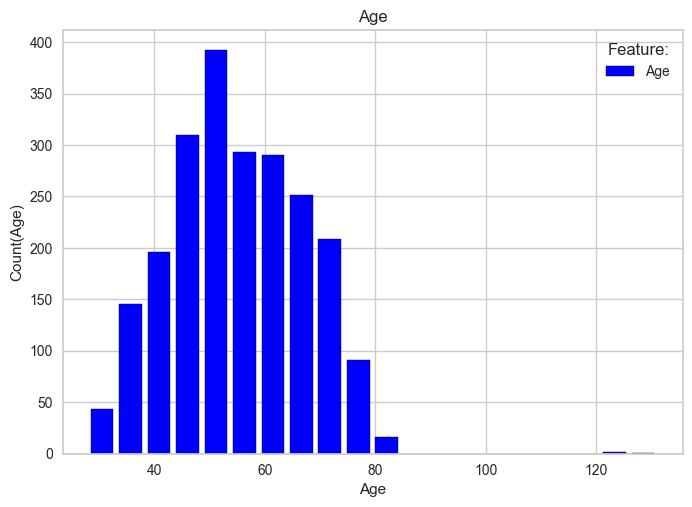

In [13]:
vis1 = df[['Age']]

#Histrogramm erstellen
vis1.plot(kind='hist', rwidth=0.8, bins=20, color='blue', edgecolor='black')

#Beschriftungen
plt.xlabel('Age')
plt.ylabel('Count(Age)')
plt.title('Age')
plt.legend(title='Feature:')

plt.show()

Auf den ersten Blick scheint das Alter bis zu etwa 85 Jahren gut verteilt zu sein. Es gibt jedoch 2-3 Ausreißer, die angeblich über 120 Jahre alt sind. Das sehen wir uns näher an:

In [14]:
df[df['Age'] > 90]['Age'] #Kunden über 90

192    124
239    131
339    125
Name: Age, dtype: int64

Das stimmt so nicht. Die älteste Person der Welt ist im Alter von 122 Jahren gestorben. Dies sind höchstwahrscheinlich Falscheinträge von Kunden, die ihre privaten Informationen wie das Alter nicht preisgeben wollten.

In [15]:
df[df['Age'] > 90]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
192,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,...,2,5,0,0,0,0,0,1,0,124
239,2n Cycle,Single,60182.0,0,1,23,8,0,5,7,...,2,4,0,0,0,0,0,0,0,131
339,PhD,Together,83532.0,0,0,36,755,144,562,104,...,4,1,0,0,1,0,0,0,0,125


Der Durchschnittswert des Einkommens beträgt 52'247.25 (siehe IDA). Der Kunde in Zeile 339 liegt weit darüber. Auch die Ausgaben für Wein (Durchschnitt 303.93), Früchte (26.03), Fleisch (166.95) und Fisch (37.52) sind deutlich höher. Der Kunde in Zeile 339 scheint ein Falscheintrag zu sein. Natürlich könnte der Kunde sich beim Alter vertippt haben, aber angesichts des Einkommens und der Produktausgaben erscheint das unwahrscheinlich. Die anderen beiden Kunden haben realistischere Einträge, und es könnte sein, dass sie sich beim Alter vertippt haben, indem sie eine 1 vor ihre tatsächliche Zahl gesetzt haben, da diese nahe an den Zahlen 2 und 3 liegt auf der Tastatur.

Um Verzerrungen im Ergebnis zu vermeiden durch mögliche Falschangaben, wird der Kunde mit dem Alter von 125 Jahren gelöscht. Bei den anderen zwei Kunden wird die 1 vor dem Alter entfernt, um das tatsächliche Alter zu ehalten:

In [16]:
#Ersetzen von Alterswerten
df.loc[df['Age'] == 124, 'Age'] = 24
df.loc[df['Age'] == 131, 'Age'] = 31

#Überprüfen der Änderungen
df[df['Age'] > 90]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
339,PhD,Together,83532.0,0,0,36,755,144,562,104,...,4,1,0,0,1,0,0,0,0,125


In [17]:
#Kunde in Zeile 339 löschen
df.drop(339, inplace=True)

In [18]:
#Erneut prüfen
df[df['Age'] > 90]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age


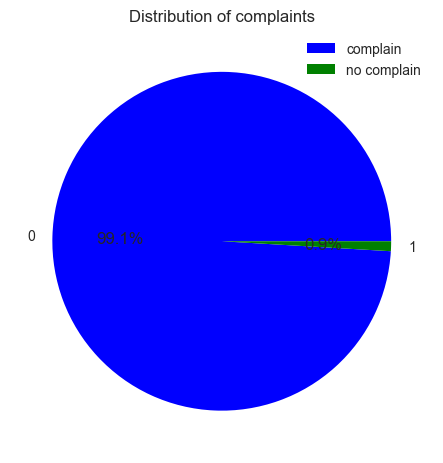

In [19]:
#Häufigkeiten der Werte in 'Complain' zählen
complain_counts = df['Complain'].value_counts()

#Pie Chart erstellen
complain_counts.plot(kind='pie', colors=['blue', 'green'], autopct='%1.1f%%')

# Beschriftungen
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of complaints')
plt.legend(labels=['complain', 'no complain'])
plt.show()

In [20]:
complain_counts

Complain
0    2218
1      21
Name: count, dtype: int64

Das Schaubild zu Beschwerden zeigt, dass sich nur 0.9% der 2239 Kunden beschwert haben. Im IDA-Schritt hatte ich zwar geschrieben, dass das Attribut entfernt werden könnte, da es mit einer Standardabweichung von 0.086 kaum Einfluss hat. Es könnte jedoch ein kleines Cluster von Kunden entstehen, die eher zur Beschwerde neigen, was dem Supermarkt wertvolle Erkenntnisse liefern könnte. Obwohl 21 Kunden nicht viel sind, entscheide ich mich aus diesem Grund, das Attribut beizubehalten. Eine spätere Skalierung sollte helfen, die Daten auf einen gemeinsamen Wertebereich zu bringen.

<Axes: >

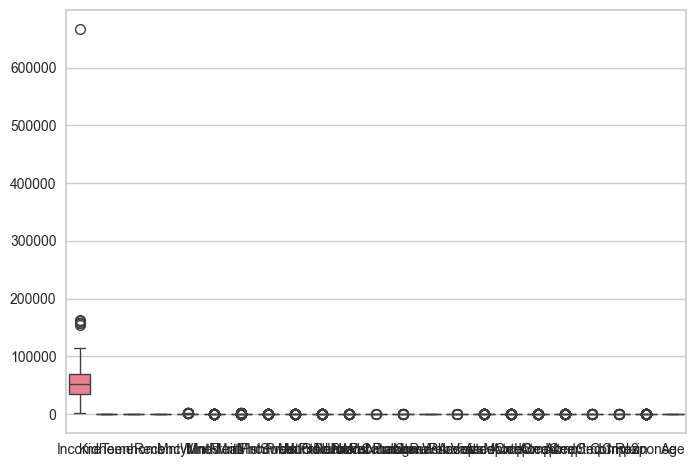

In [21]:
#Boxplot Visualisation aller Attribute, um Ausreißer zu finden
sns.boxplot(df)

Income scheint Ausreißer zu haben. Schauen wir uns das näher an:

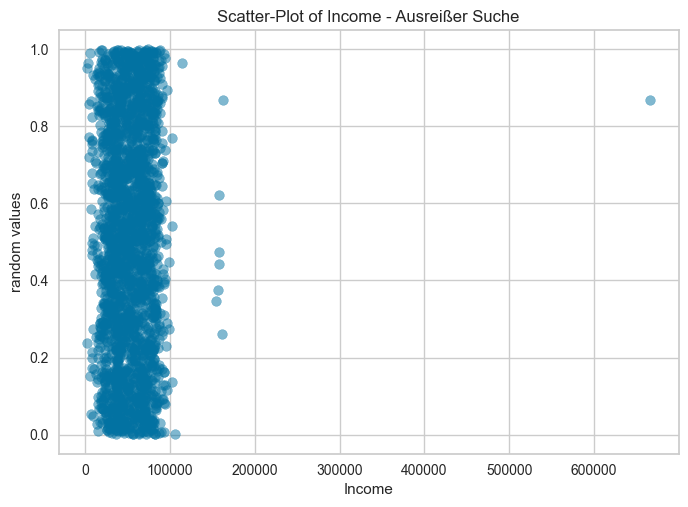

In [22]:
#Daten vorbereiten
income = df['Income']
values = np.random.rand(len(income))  #Zufällige Werte für die Y-Achse

#Scatter-Plot erstellen
plt.scatter(income, values, alpha=0.5)

# Beschriftungen
plt.xlabel('Income')
plt.ylabel('random values')
plt.title('Scatter-Plot of Income - Ausreißer Suche')
plt.show()

Die hohe Range von Income hat bereits Ausreißer vermuten lassen, wehsalb ich dies näher untersuchen wollte. Es gibt vereinzelnt 8 Ausreißer neben der verdichteten Punktewolke. Einige davon liegen näher an der Wolke, aber es gibt auch einen "Extremausreißer".  Diesen Kunden möchte ich mir näher ansehen:

In [23]:
df[df['Income'] > 5e5]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
2233,Graduation,Together,666666.0,1,0,23,9,14,18,8,...,3,6,0,0,0,0,0,0,0,47


Der Kunde hat einen "graduate" Abschluss, verdient unrealistisch viel und gibt gleichzeitig kaum etwas aus. Das passt nicht ganz zusammen. Die Produktaushgaben sind auch alle unter dem Durschnitt. Das Gehalt könnte also höchst wahrscheinlich falsch sein und damit auch andere Angaben. Um in der Kundensegmentierung nicht verzerrte Eregbnisse herauszubekommen wird der Extremausreißer rausgelöscht. 

In [24]:
#Kunde mit Extrem-Ausreißer in Zeile 2233 löschen
df.drop(2233, inplace=True)

In [25]:
df[df['Income'] > 1.5e5]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
164,PhD,Married,157243.0,0,1,98,20,2,1582,1,...,0,0,0,0,0,0,0,0,0,51
617,PhD,Together,162397.0,1,1,31,85,1,16,2,...,1,1,0,0,0,0,0,0,0,48
655,Graduation,Divorced,153924.0,0,0,81,1,1,1,1,...,0,0,0,0,0,0,0,0,0,49
687,PhD,Married,160803.0,0,0,21,55,16,1622,17,...,1,0,0,0,0,0,0,0,0,42
1300,Master,Together,157733.0,1,0,37,39,1,9,2,...,1,1,0,0,0,0,0,0,0,53
1653,Graduation,Together,157146.0,0,0,13,1,0,1725,2,...,0,1,0,0,0,0,0,0,0,47
2132,PhD,Married,156924.0,0,0,85,2,1,2,1,...,0,0,0,0,0,0,0,0,0,75


In [26]:
df.shape

(2238, 25)

Die restlichen Ausreißer scheinen realistischere Werte zu haben und aus diesem Grund lasse ich diese im Datensatz drinnen. Die Recency, was die Anzahl an Tagen seit dem letzten Einkauf zeigt, scheint bei mehreren Kunden höher zu sein. Vor allem bei Kunden in den Zeilen 164, 655 und 2132 mit über 80 Tagen seit dem letzten Einkauf. Es gibt aber auch Kunden, die einen Monat lang nicht mehr in dem Supermarkt einkaufen waren. Aus diesem Grund scheinen die Gesamteinkaufssummen realistisch zu sein. Das könnten Einmal Kunden sein oder Verwandschaft die selten mal zu besuch da ist und dann in dem Supermarkt einkaufen geht. Nichtsdestotrotz sind diese Kunden auch wichtig und möglicherweise mit attraktiven Marketingaktionen zu mehr besuchen zu begeistern. 

##### Behandlung der fehlenden Werte im Income:
Wie bei der IDA besprochen, gibt es 24 Fehlwerte im Income-Attribut. Da 24 Kunden im Vergleich zur Größe des gesamten Datensatzes nicht viel ausmachen, habe ich mich entschieden, diese Kunden zu löschen. Die Range des Einkommens ist hoch und es gibt verschiedene Einkommensbereiche. Eine Löschung erscheint mir daher als plausibler und birgt eine geringere Gefahr, die Ergebnisse zu verzerren.


In [27]:
#Fehlwerte entfernen
df = df.dropna()
print("Missing Values:\n", df.isnull().sum(), "\n")

Missing Values:
 Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
dtype: int64 



In [28]:
#Education Einträge ansehen
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [29]:
#Ersetzen von "2n Cycle" in Master:
df.loc[df['Education'] == '2n Cycle', 'Education'] = 'Master'

#Überprüfen der Änderung
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

Der Wert "2n Cycle" des Attributes "Education" wurde durch den Abschluss "Master" ersetzt, da beide Werte in "Education" vorhanden waren und beide die gleiche 
Bedeutung haben.

In [30]:
#Marital_Status Einträge ansehen
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [31]:
#Ersetzen von subjektiven Werten in 'Marital_Status' zu Single:
df.loc[df['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Single'

#Überprüfen der Änderung
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

Ersetzung der Werte "YOLO", "Absurd", "Alone" des Attributes "Marital_Status" in Single. Vermutet wird, dass diese unpassenden Beschreibungen von Einzelpersonen eingetragen wurden, die anonym bleiben wollten, weshalb sie durch den Wert Single ersetzt wurden.

In [32]:
#Umwandeln der 'Education' und 'Marital_Status' Spalte in den kategorialen Datentyp
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

#Überprüfen der neuen Datentypen
print('Education Datentyp:',df['Education'].dtype)
print('Marital_Status Datentyp:',df['Marital_Status'].dtype)

Education Datentyp: category
Marital_Status Datentyp: category


In [33]:
#Binäres Mapping für Marital_Status in 1:  zusammen (partnerschaft) und 0: nicht zusammen  (keine partnerschaft)
df['Is_Couple'] = df['Marital_Status'].replace({
    'Single': 0, 'Divorced': 0, 'Widow': 0,
    'Together': 1, 'Married': 1
})

#Überprüfen der neuen Spalte
print(df[['Marital_Status', 'Is_Couple']].head())

  Marital_Status Is_Couple
0         Single         0
1         Single         0
2       Together         1
3       Together         1
4        Married         1


###### Replace Dokumentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html 

In [34]:
#Datentyp überprüfen
df['Is_Couple'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [35]:
#Umwandeln in int von kategorisch
df['Is_Couple'] = df['Is_Couple'].astype(int)

#Nochmal den Datentyp überprüfen
print(df['Is_Couple'].dtype)

int32


Durch die Erstellung des binären Features 'Is_Couple' wird die Interpretierbarkeit der Ergebnisse verbessert für die anschließende Clusteranalyse. Kunden, die hohe Werte für dieses Feature aufweisen, repräsentieren solche, die in einer Beziehung leben, während niedrige Werte Kunden darstellen, die alleine leben. Dies ermöglicht eine klarere Differenzierung der Kundengruppen basierend auf ihrem Beziehungsstatus. Die Kenntnis über den Beziehungsstatus ist besonders wertvoll für die Entwicklung zielgerichteter Marketingstrategien. Zum Beispiel könnten Kunden in Beziehungen anders auf Kampagnen reagieren, die auf Familien oder Paare ausgerichtet sind, im Gegensatz zu alleinstehenden Kunden, die möglicherweise andere Bedürfnisse und Vorlieben haben.

##### Pearson-Korrelation:

###### Korrelationsmatrix: https://stackoverflow.com/questions/74425579/correlation-matrix-in-pandas-showing-only-few-columns
###### Seaborn-heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html

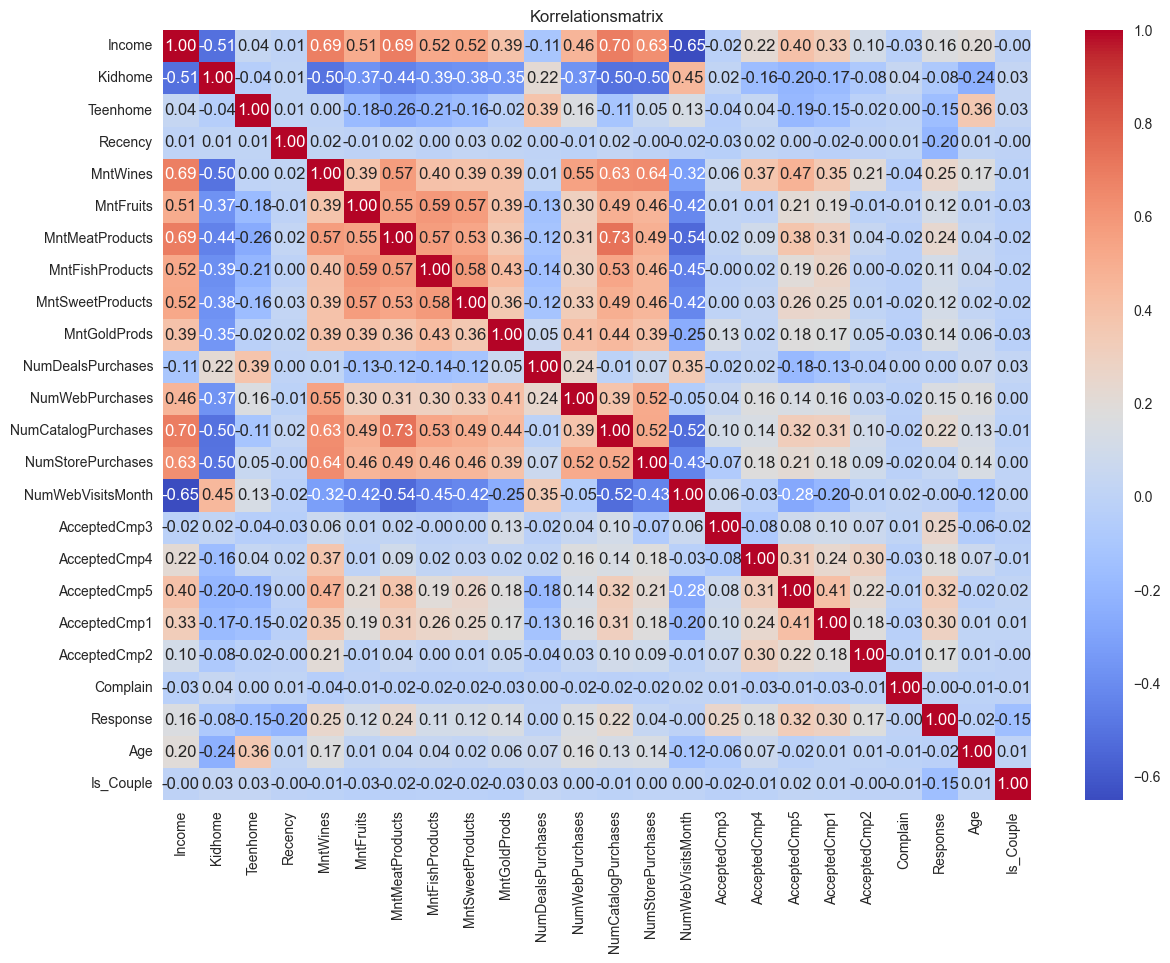

In [36]:
#Visualisieren der Korrelationsmatrix als Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Korrelationsmatrix')
plt.show()

##### Interpretation der Korrelationsergebnisse:
* An erster Stelle fällt auf, dass das Feature 'Income' eine hohe Korrelation mit mehreren anderen Features hat. Die verschiedenen gekauften Produkte haben dabei eine unterschiedlich hohe Korrelation. Beispielsweise weisen Fleischprodukte und Weinprodukte mit jeweils 0.69 eine hohe positive Korrelation auf. Das bedeutet, dass je höher das Einkommen ist, desto mehr werden diese Produkte gekauft. Diese Information könnte wichtig für die Kundensegmentierung sein. Da die gekauften Produkte unterschiedlich hoch korreliert sind und unterschiedlich beliebt sind, macht es Sinn, diese Features so zu belassen und sie nicht nach Zusammenzufassung rauszulöschen. Die einzelnen Muster sind wichtig, um spezifische Marketingkampagnen erstellen zu können.
* Die angenommenen Kampagnen weisen eher niedrige Korrelationen auf. Wie in der IDA bereits festgestellt, ist die Standardabweichung für die unterschiedlichen Kampagnenannahmen sehr niedrig. Um den Features mehr Aussagekraft für die Clusteranalyse zu geben, werde ich diese nach der Korrelations-Analyse in ein Feature zusammenfassen, das die Gesamtanzahl an akzeptierten Kampagnen darstellt, um die Variabilität zu erhöhen.
* Die Webseiteneinkäufe, Offline- sowie Katalogeinkäufe haben alle eine positive, recht hohe Korrelation mit den unterschiedlichen Produkten. Dies zeigt, dass je mehr diese Möglichkeiten in Anspruch genommen werden, desto mehr wird ausgegeben/gekauft. Die Webseitenbesucher weisen jedoch eine negative Korrelation auf, was bedeutet, dass im Durchschnitt eher weniger gekauft wird, je mehr Webseitenbesucher vorhanden sind. Das heißt also, je mehr Besucher auf der Webseite sind, desto höher ist die Wahrscheinlichkeit, dass jemand nur reinschaut, um sich Informationen zu besorgen. Die Optimierung der Online-Plattform könnte hier von Bedeutung sein.
* Betrachtet man die negative Korrelation zwischen 'Kidhome' und den unterschiedlichen Produktausgaben, lässt sich daraus schließen, dass in diesem Supermarkt weniger ausgegeben wird, je mehr Kinder vorhanden sind bzw. wenn ein Kind vorhanden ist. Da der maximale Wert von 'Kidhome' 2 ist, lässt es eher darauf schließen, dass das Vorhandensein von Kindern zu weniger Ausgaben führt. Dies könnte bedeuten, dass der Supermarkt für Ältere attraktiver ist. Dementsprechend kann man stattdessen ein binäres Feature 'Has_Child' erstellen, das allgemein angibt, ob der Kunde Kinder hat oder nicht.
* Zumindest korreliert 'Kidhome' positiv mit 'NumWebVisits', auch wenn es dann wieder negativ mit 'NumWebPurchases' korreliert. Die positive Korrelation mit den Websitebesuchen zeigt, dass Kunden mit Kindern eher den Store online besuchen, auch wenn es nicht zum Kauf kommt. 'Kidhome' korreliert aber mit 0.22 mit 'NumDealsPurchases' und 'Teenhome' sogar mit 0.39. Das heißt, Kunden mit Kindern tendieren eher dazu, Deals anzunehmen. Vielleicht kaufen diese online nicht ein, weil online nicht die Möglichkeit besteht, Deals einzulösen.


##### Kidhome und Teenhome Werteverteilung näher angucken:

###### Für text über bar-plots: https://stackoverflow.com/questions/40489821/how-to-write-text-above-the-bars-on-a-bar-plot-python

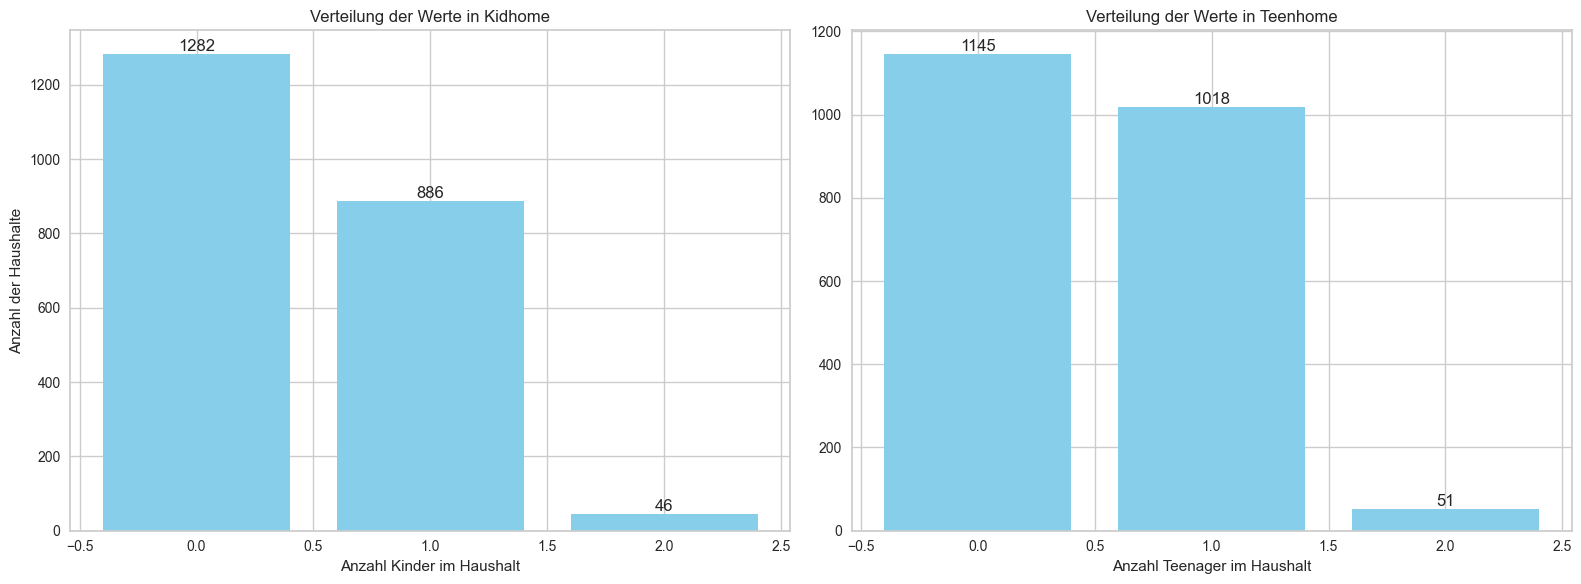

In [37]:
#Zählen der Werte in 'Kidhome' und 'Teenhome'
kidhome_counts = df['Kidhome'].value_counts()
teenhome_counts = df['Teenhome'].value_counts()

#Erstellung einer Visualisierung mit zwei Subplots nebeneinander
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

#Balkendiagramm für 'Kidhome'
bars1 = axes[0].bar(kidhome_counts.index, kidhome_counts.values, color='skyblue')
axes[0].set_title('Verteilung der Werte in Kidhome')
axes[0].set_xlabel('Anzahl Kinder im Haushalt')
axes[0].set_ylabel('Anzahl der Haushalte')
for i in bars1:
    height = i.get_height()
    axes[0].text(i.get_x() + i.get_width()/2, height, int(height), ha='center', va='bottom')

#Balkendiagramm für 'Teenhome'
bars2 = axes[1].bar(teenhome_counts.index, teenhome_counts.values, color='skyblue')
axes[1].set_title('Verteilung der Werte in Teenhome')
axes[1].set_xlabel('Anzahl Teenager im Haushalt')
for z in bars2:
    height = z.get_height()
    axes[1].text(z.get_x() + z.get_width()/2, height, int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Wie befüchtet sind es kaum mehr als ein Kind, deshalb können die Features 'Kidhome' und 'Teenhome' als 'Has_Child' Feature zusammengefasst werden. 

In [38]:
df['Has_Child'] = ((df['Kidhome'] + df['Teenhome']) > 0).astype(int)

In [39]:
df.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Is_Couple,Has_Child
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,67,0,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,70,0,1
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,59,1,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,40,1,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,43,1,1


In [40]:
#Kampagnen zusammenfassen
df['AcceptedCamp_all'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [41]:
df['AcceptedCamp_all'].dtype

dtype('int64')

In [42]:
#Gesamtausgaben
df['TotalSpending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

##### Kategoriales Feature 'Education' näher angucken, um zu sehen ob Dimensionalität verringert werden kann durch Gruppierung

In [43]:
df['Education'].unique()

['Graduation', 'PhD', 'Master', 'Basic']
Categories (4, object): ['Basic', 'Graduation', 'Master', 'PhD']

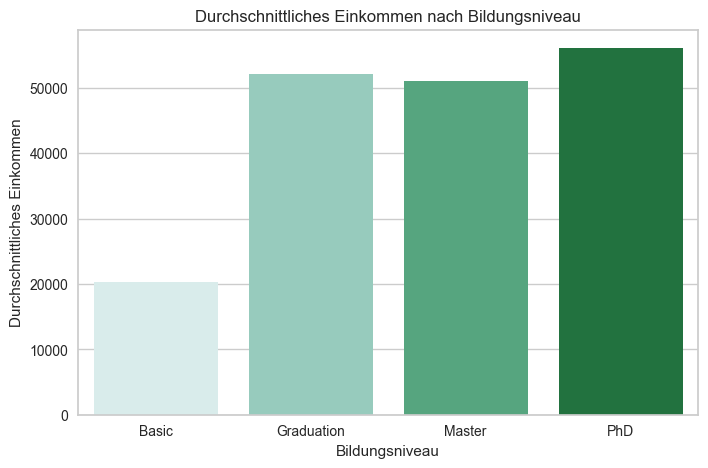

In [44]:
#Durchschnittliches Einkommen für jedes Bildungsniveau
average_income_by_education = df.groupby('Education')['Income'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(x='Education', y='Income', data=average_income_by_education, palette='BuGn')
plt.title('Durchschnittliches Einkommen nach Bildungsniveau')
plt.xlabel('Bildungsniveau')
plt.ylabel('Durchschnittliches Einkommen')
plt.show()

###### Farbpaletten: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

Graducation und Master verdienen gleich viel. Die Bildungsniveaus sind also etwa gleichrankig und können zusammengenommen werden, um die dimensionalität zu reduzieren. Laut recherche wird ein 'Graduate' Abschluss auch eher als Master Abschluss angesehen, weshalb die Visualisierung Sinn macht. Es ist ein Abschluss den man nach dem Bachelor macht. 
Quelle: https://www.dictionary.com/e/undergraduate-vs-graduate/

In [45]:
#Bildungsniveaus zuordnen
education_map = {
    'PhD': 'High',
    'Master': 'Middle',
    'Graduation': 'Middle',
    'Basic': 'Low' 
}

#Zuordnung auf die Spalte anwenden
df['Educational_Level'] = df['Education'].map(education_map)

In [46]:
print(df.columns)

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Is_Couple', 'Has_Child',
       'AcceptedCamp_all', 'TotalSpending', 'Educational_Level'],
      dtype='object')


In [47]:
#Entfernen irrelevanter Attribute nach Feature-Erstellung, da sonst redundant
df.drop(['Kidhome', 'Teenhome', 'Education', 'Marital_Status', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'], axis=1, inplace=True)
df.shape

(2214, 20)

##### One-hot-Encoding des kategorischen Features Educational-level: 

In [48]:
df = pd.get_dummies(df, columns=['Educational_Level'])

###### Quelle: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

##### Clustering:

Für die Kundensegmentierung habe ich K-Means und das Hierarchische Agglomerative Clustering (HAC) gewählt, da beide Techniken optimal auf die Analyse von Kundendaten zugeschnitten sind. K-Means ist effizient und ideal für numerische Daten wie Alter und Einkommen, da es präzise und gut abgrenzbare Cluster erstellt. HAC bietet hingegen die Flexibilität, verschiedene Distanzmaße zu verwenden und erfordert keine vordefinierte Clusteranzahl, was bei unsicheren Datenstrukturen vorteilhaft ist. Durch seine Fähigkeit, Dendrogramme zu erzeugen, ermöglicht HAC zudem eine intuitive visuelle Überprüfung der Clusterbildung.

Zusammen ergänzen sich beide Methoden perfekt: K-Means für schnelle und klare Segmentierungen, HAC für tiefere Einblicke und flexible Anpassungen an die Kundendaten. 

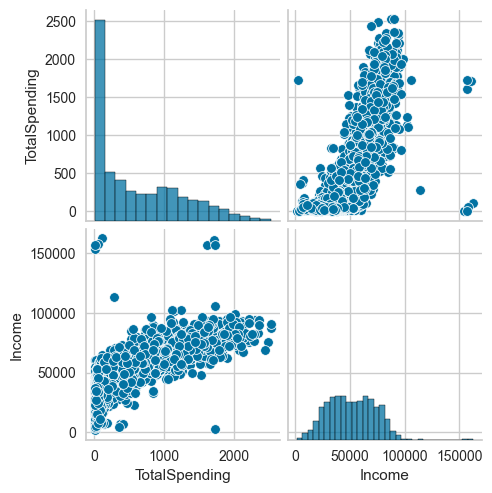

In [49]:
df_subset = df[['TotalSpending', 'Income']]

sns.pairplot(df_subset)

Nach der Analyse verschiedener Paare von Features mittels pairplot zeigten keine der Visualisierungen  Cluster Strukturen. Dies deutet darauf hin, dass einfache bivariate Plots nicht ausreichen, um die zugrundeliegenden Muster und Segmentierungen in den Daten effektiv darzustellen. Aufgrund dieser Beobachtung, werde ich den pairplot nicht weiter in die Analyse einbeziehen. 

Da die Features in unterschiedlichen Einheiten und Wertebereichen vorliegen und Clustering-Methoden wie K-Means sowie Agglomeratives Hierarchisches Clustering (HAC) empfindlich auf solche Unterschiede reagieren, werde ich als nächsten Schritt eine Skalierung der Daten vornehmen. Ich verwende den StandardScaler, um die Daten zu normalisieren und so eine einheitliche Standardabweichung für alle Features zu erreichen.

In [50]:
scaler = StandardScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_sc.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,NumWebVisitsMonth,Complain,Age,Is_Couple,Has_Child,AcceptedCamp_all,TotalSpending,Educational_Level_High,Educational_Level_Low,Educational_Level_Middle
0,0.287341,0.309854,0.978553,1.553027,1.691313,2.454739,1.484683,0.853340,0.351735,1.427767,...,0.69275,-0.097857,1.018348,-1.347885,-1.582139,0.617907,1.677184,-0.526134,-0.158114,0.563788
1,-0.260812,-0.381033,-0.871926,-0.637118,-0.717741,-0.650700,-0.633647,-0.733311,-0.168119,-1.125606,...,-0.13229,-0.097857,1.274245,-1.347885,0.632056,-0.502524,-0.962505,-0.526134,-0.158114,0.563788
2,0.913623,-0.795566,0.358761,0.571238,-0.177935,1.340435,-0.146675,-0.036732,-0.687974,1.427767,...,-0.54481,-0.097857,0.335956,0.741903,-1.582139,-0.502524,0.280971,-0.526134,-0.158114,0.563788
3,-1.176323,-0.795566,-0.871926,-0.561596,-0.655284,-0.504562,-0.584950,-0.752660,-0.168119,-0.760838,...,0.28023,-0.097857,-1.284724,0.741903,0.632056,-0.502524,-0.919341,-0.526134,-0.158114,0.563788
4,0.294545,1.553451,-0.391513,0.420193,-0.218085,0.153061,-0.000583,-0.559166,1.391445,0.333464,...,-0.13229,-0.097857,-1.028827,0.741903,0.632056,-0.502524,-0.306733,1.900658,-0.158114,-1.773716


##### K-Means Clustering:

Ich probiere verschiedene k-Werte aus und evaluieren diese mit dem Silhouette Koeffizient, um das bestmögliche k herauszubekommen: 

In [51]:
def compute_and_plot_silhouettes(df_sc, range_=range(2,11)):
    silhouettes=[]
    for k in range(2,11):
        kmeans=KMeans(n_clusters=k, random_state=1, n_init=10) 
        cluster_assignments = kmeans.fit_predict(df_sc)
        silhouettes.append(silhouette_score(df_sc,cluster_assignments))

    plt.plot(range(2,11), silhouettes)
    return silhouettes

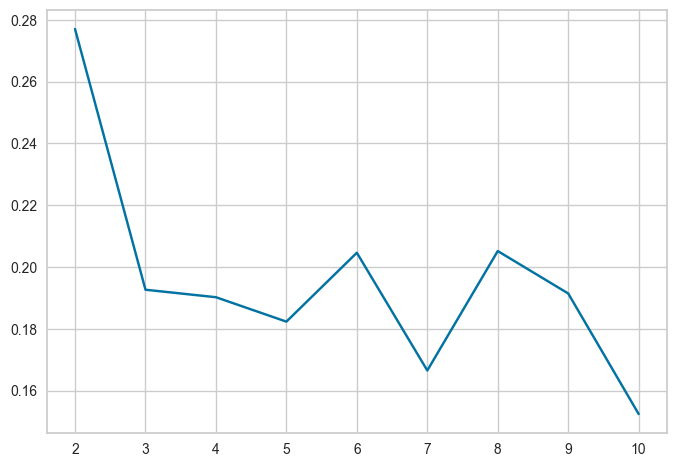

In [52]:
plain_silhouettes=compute_and_plot_silhouettes(df_sc.to_numpy())

In [53]:
best_k=np.array(plain_silhouettes).argmax() + 2 # array starts at k=2
best_k

2

##### Beobachtungen:
* k = 2 scheint den höchste Silhouette Koeffizient zu besitzen. Der Kunde wollte aber wenn möglich mehr als zwei Kundensegmente, weshalb andere Cluster in betracht gezogen werden.
* k = 3, 4, 5 und 6 sind auch Kluster die näher betrachtet werden können.  
* Größere Cluster wären zu viele Cluster was der Kunde nicht möchte, da größere Anzahlen an Kunden angesprochen werden sollen, weshalb diese nicht betrachtet werden.

In [54]:
def plot_cluster_projections(kmeans, X, index_pairs, column_names, fitted=False):
    '''
    Plot 2D projections for different (x, y) index pairs in a single visualization for given k-means setup.
    Parameters:
        kmeans: A KMeans object (either pre-fitted or not).
        X: Dataset as a numpy array.
        index_pairs: List of tuples, each representing a pair of indices (x, y) for the axes of the plot.
        column_names: List of column names for labeling axes.
        fitted: Flag indicating if kmeans object is already fitted.
    '''
    n_rows = len(index_pairs)
    plt.figure(figsize=(8 * n_rows, 8))
    
    if not fitted:
        cluster_assignments = kmeans.fit_predict(X)
    else:
        cluster_assignments = kmeans.predict(X)
    
    colors = ['darkorange', 'darkmagenta', 'dodgerblue', 'green', 'red', 'cyan', 'brown', 'pink', 'gray', 'olive']
    
    for idx, (index_x, index_y) in enumerate(index_pairs, 1):
        plt.subplot(1, n_rows, idx)
        X_sub = X[:, [index_x, index_y]]
        
        for i in range(len(np.unique(cluster_assignments))):
            X_cluster = X_sub[cluster_assignments == i, :]
            plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=colors[i % len(colors)], label=f'Cluster {i}')

        plt.scatter(
            kmeans.cluster_centers_[:, index_x],
            kmeans.cluster_centers_[:, index_y],
            s=350, marker='*', c='crimson', edgecolor='black', label='Centroids'
        )

        plt.xlabel(column_names[index_x])
        plt.ylabel(column_names[index_y])
        plt.title(f'2D Projection: {column_names[index_x]} vs {column_names[index_y]}')
        plt.legend()

    plt.show()

In [55]:
def plot_silhouette(kmeans, X, title='Silhouette Plot'):
    '''
    Creates a silhouette plot for the given clustering model and dataset.
    Parameters:
        kmeans: A KMeans object that is already fitted to the data.
        X: Dataset as a numpy array.
        title: A string for the title of the plot.
    '''
    colors = ['darkorange', 'darkmagenta', 'dodgerblue', 'green', 'red', 'cyan', 'brown', 'pink', 'gray', 'olive']
    visualizer = SilhouetteVisualizer(kmeans, colors=colors, is_fitted=True)

    visualizer.fit(X)  
    plt.title(title)
    visualizer.finalize()
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
    print(f'Silhouette score: {silhouette_avg}')
    print(f'Davies-Bouldin score: {davies_bouldin}')
    visualizer.show()

Um die beste Clusterzahl für K-Means zu ermitteln, analysiere ich 2D-Projektionen der Features anhand unterschiedlicher Index-Paare. Diese Visualisierungen helfen, die Cluster-Verteilung zu beurteilen. Zusätzlich nutze ich neben dem Silhouette-Score den Davies-Bouldin-Score, um die Cluster-Trennung zu bewerten.

In [56]:
print(df_sc.columns) #Indexe raussuchen

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age',
       'Is_Couple', 'Has_Child', 'AcceptedCamp_all', 'TotalSpending',
       'Educational_Level_High', 'Educational_Level_Low',
       'Educational_Level_Middle'],
      dtype='object')


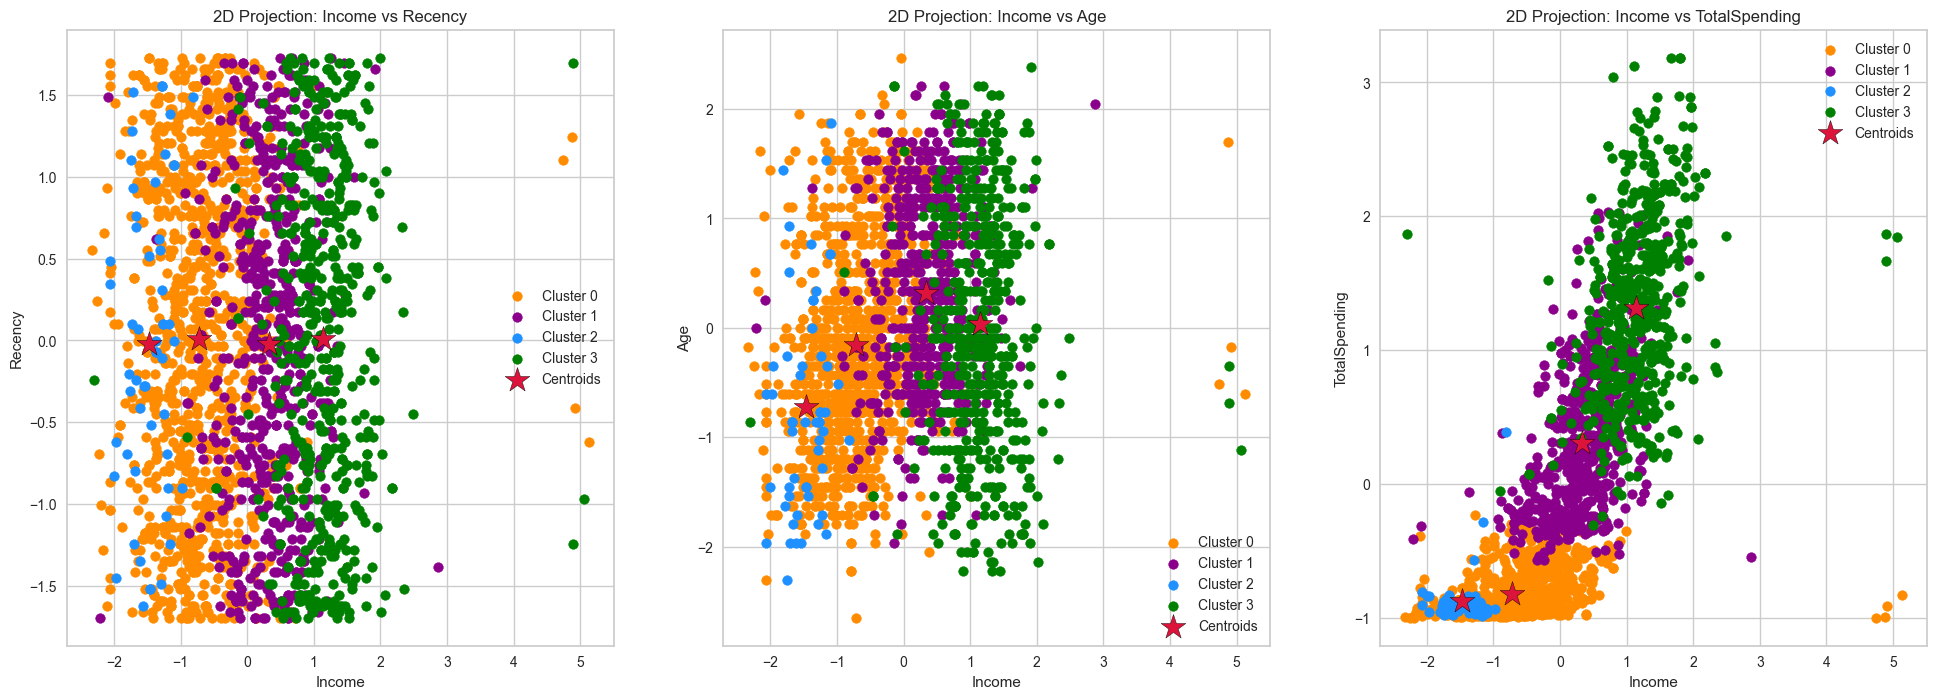

Silhouette score: 0.2142295781986997
Davies-Bouldin score: 1.6827126740569005


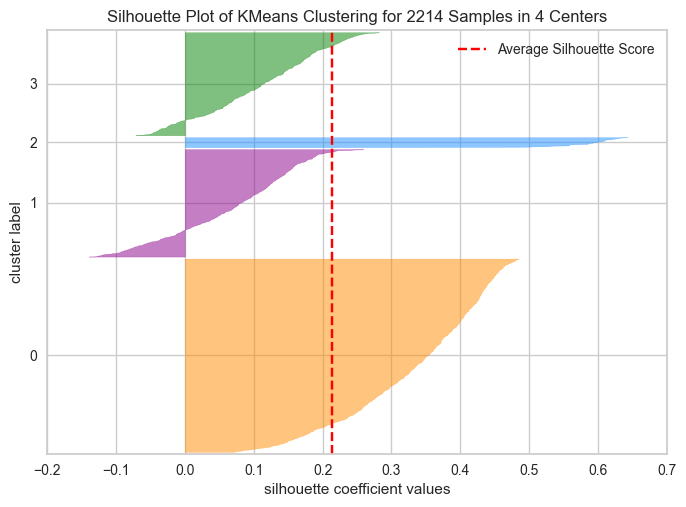

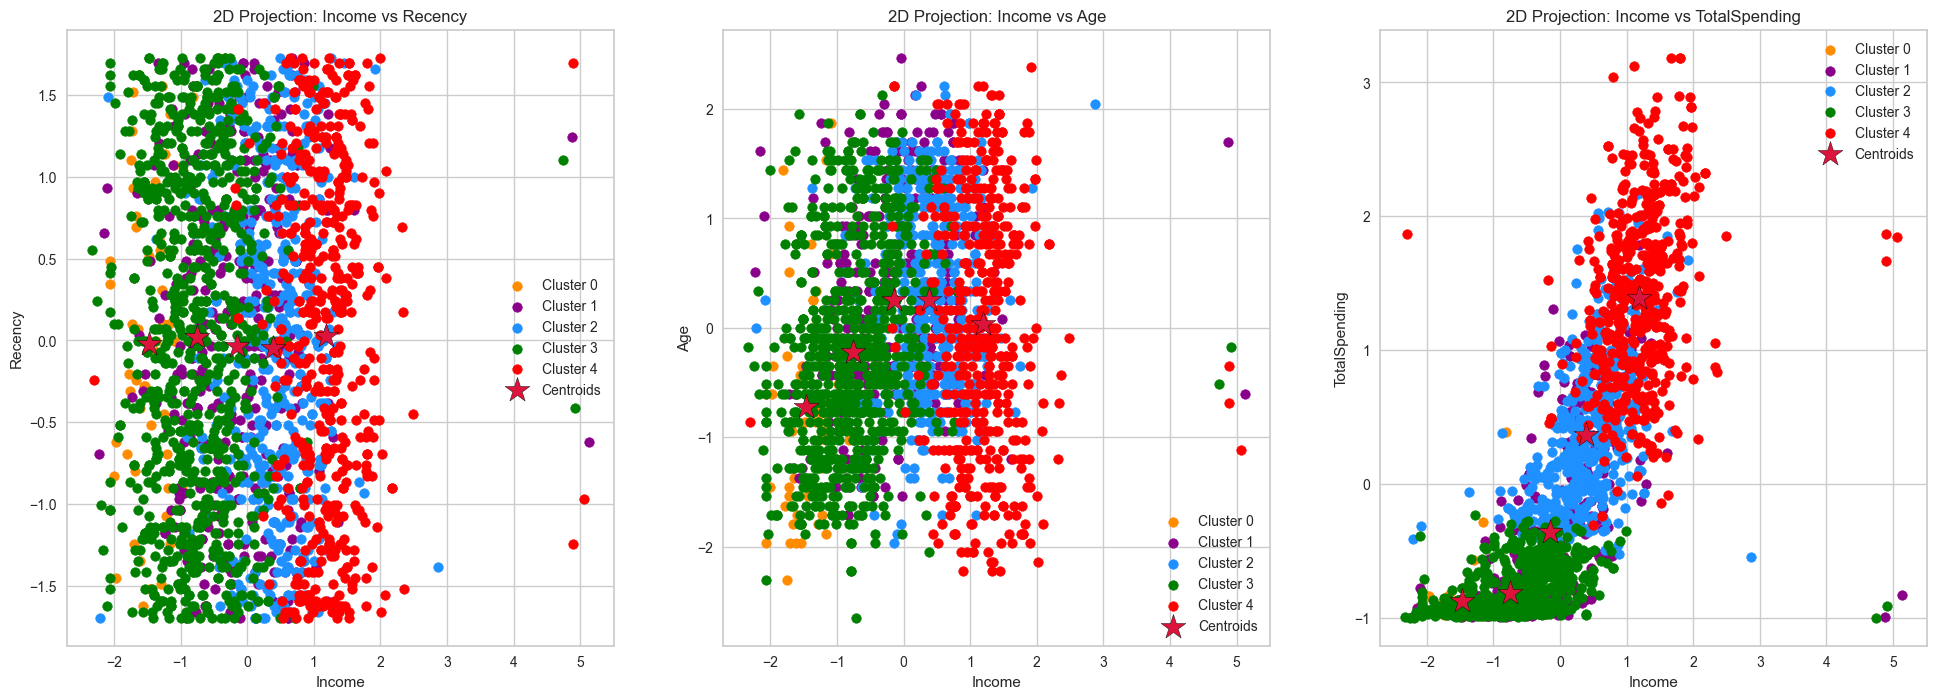

Silhouette score: 0.21147674817027698
Davies-Bouldin score: 1.6281729713210304


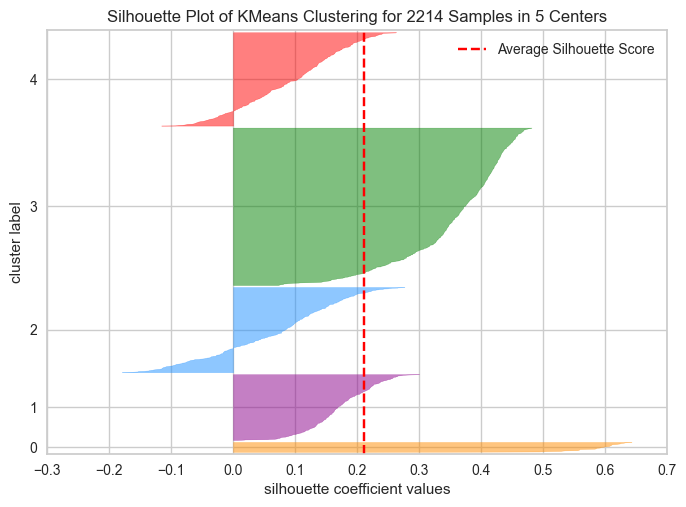

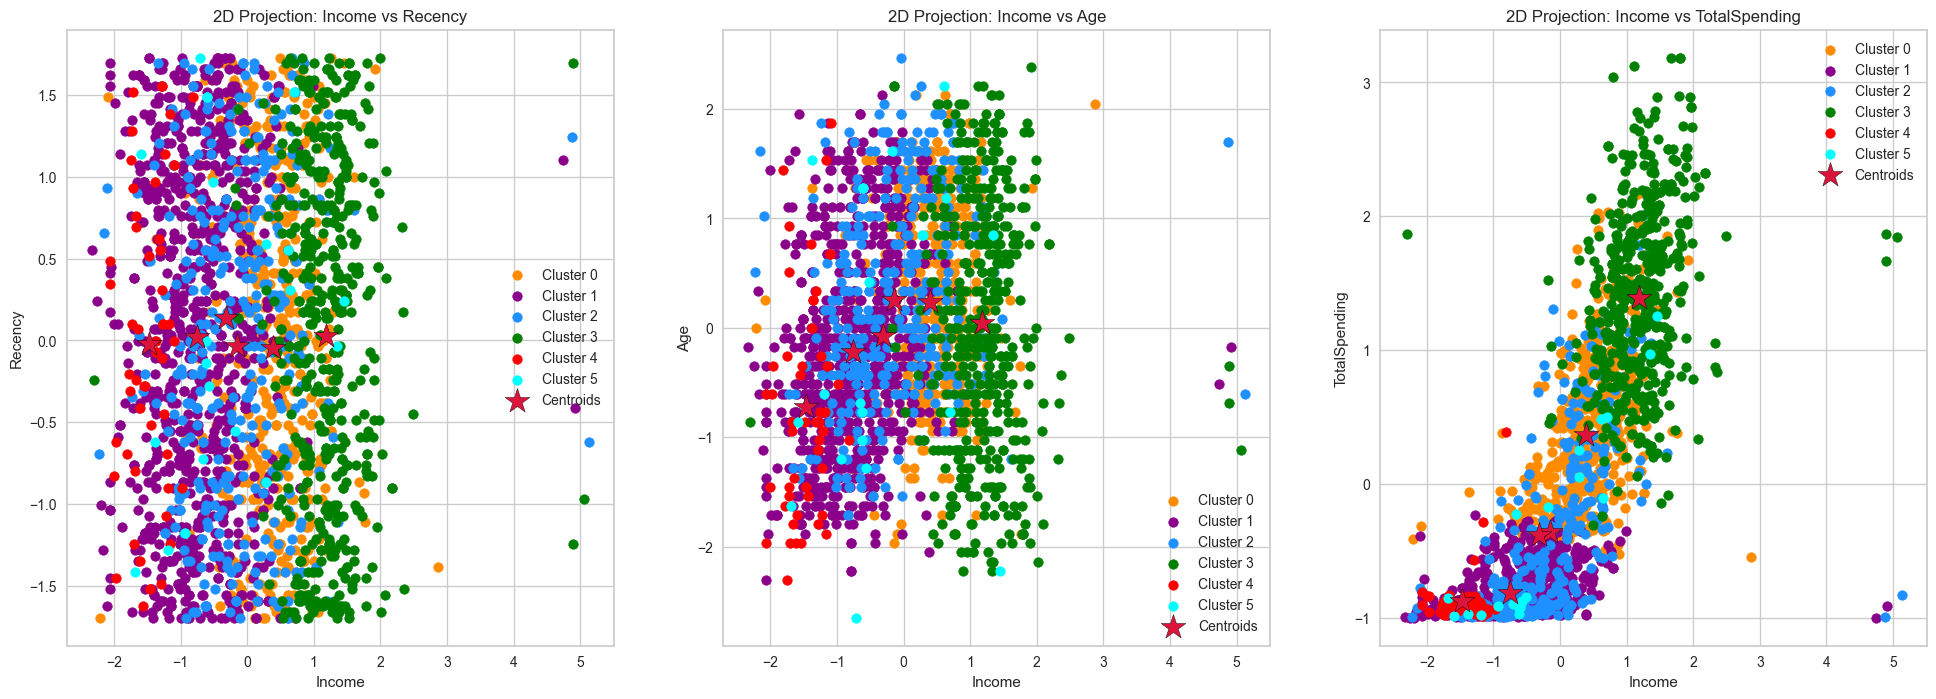

Silhouette score: 0.21926964105307778
Davies-Bouldin score: 1.4462733776648429


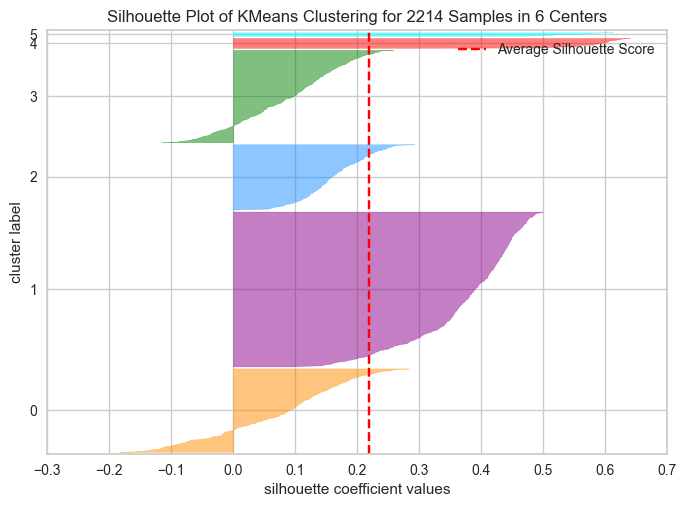

In [57]:
X = df_sc.to_numpy()
k_values = [4, 5, 6]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    plot_cluster_projections(kmeans, X, [(0, 1), (0, 14), (0, 18)], df_sc.columns, fitted=True)
    plot_silhouette(kmeans, X, title=f'Silhouette Plot for k={k}')


##### Beobachtungen: 
Scatter Plot: 
 * Cluster können nicht deutlich unterschieden werden, da diese zu verdichtet beieinander sind. 
 * Von den getesteten k-Werten scheint k = 4 die beste Trennung zu bieten.
 
Silhouette Plot: 
* Es wurden verschieden Cluster erstellt. Die meisten sind ähnlich groß, wobei ein Cluster dass sehr schmal ist auffallend ist. Dieses hat jedoch in jedem der untersuchten k-Werte den höchsten Silhouette Score. Das scheinen also gut isolierbare Kunden zu sein. 
* Der Gesamtsilhouettenkoeffizient und Davies-Bouldin Score zeigen nicht die besten Werte.
* Alle drei haben auch leicht negative Werte, was auf das Vorhandensein von Punkten hindeutet, die näher an Mitgliedern eines anderen Clusters liegen als an dem, dem sie zugeordnet wurden.

##### HAC Clustering:

In [58]:
colors=['red', 'green', 'blue', 'cyan']
def create_linkage(agg):
    n_samples = len(agg.labels_)
    counts = np.zeros(agg.children_.shape[0])
    for i, merge in enumerate(agg.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([agg.children_, agg.distances_,counts]).astype(float)
    return linkage_matrix

def cluster_and_draw(df, n_clusters, affinity, linkage, color_threshold):
    agg = cluster.AgglomerativeClustering(
        n_clusters=n_clusters, 
        metric=affinity, 
        linkage=linkage, 
        compute_distances=True
    )
    labels = agg.fit_predict(df)
    hierarchy.set_link_color_palette(colors)
    plt.figure(figsize=(18,5))
    dendrogram(
        create_linkage(agg),
        color_threshold=color_threshold, 
        orientation='left', 
        labels=df.index, 
        leaf_rotation=0)
    plt.show()
    return labels

In [59]:
def compute_and_plot_silhouettes_hac(df, range_=range(2, 11)):
    silhouettes = []
    for k in range_:
        hac = AgglomerativeClustering(n_clusters=k, linkage='ward')
        labels = hac.fit_predict(df)
        silhouette_avg = silhouette_score(df, labels)
        silhouettes.append(silhouette_avg)

    plt.plot(range_, silhouettes)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.show()

    return silhouettes

In [60]:
def plot_silhouette(agg, X, title='Silhouette Plot'):
    '''
    Creates a silhouette plot for the given HAC clustering model and dataset.
    Parameters:
        agg: An AgglomerativeClustering object that is already fitted to the data.
        X: Dataset as a numpy array.
        title: A string for the title of the plot.
    '''
    colors = ['darkorange', 'darkmagenta', 'dodgerblue', 'green', 'red', 'cyan', 'brown', 'pink', 'gray', 'olive']
    visualizer = SilhouetteVisualizer(agg, colors=colors, is_fitted=True)

    visualizer.fit(X)
    plt.title(title)
    visualizer.finalize()
    silhouette_avg = silhouette_score(X, agg.labels_)
    davies_bouldin = davies_bouldin_score(X, agg.labels_)
    print(f'Silhouette score: {silhouette_avg}')
    print(f'Davies-Bouldin score: {davies_bouldin}')
    visualizer.show()


##### Dendrogramme:

##### Wahl der Ward-Linkage-Methode:
Für das hierarchische agglomerative Clustering habe ich die Ward-Linkage-Methode gewählt. Diese Methode minimiert die Varianz innerhalb der Cluster, was bedeutet, dass die Datenpunkte innerhalb jedes Clusters möglichst eng beieinander liegen. Dies führt zu homogeneren und besser getrennten Clustern, was die Clusterbildung effizienter und interpretierbarer macht. In mehreren Tests hat sich diese Methode als die beste Option für diesen Datensatz herausgestellt. Ich habe verschiedene Linkage-Optionen wie Single, Complete und Average ausprobiert, aber Ward lieferte die besten Ergebnisse in Bezug auf die Silhouette-Scores und die visuelle Interpretierbarkeit der Dendrogramme. Daher habe ich mich entschieden, Ward für die endgültige Clusteranalyse zu verwenden.

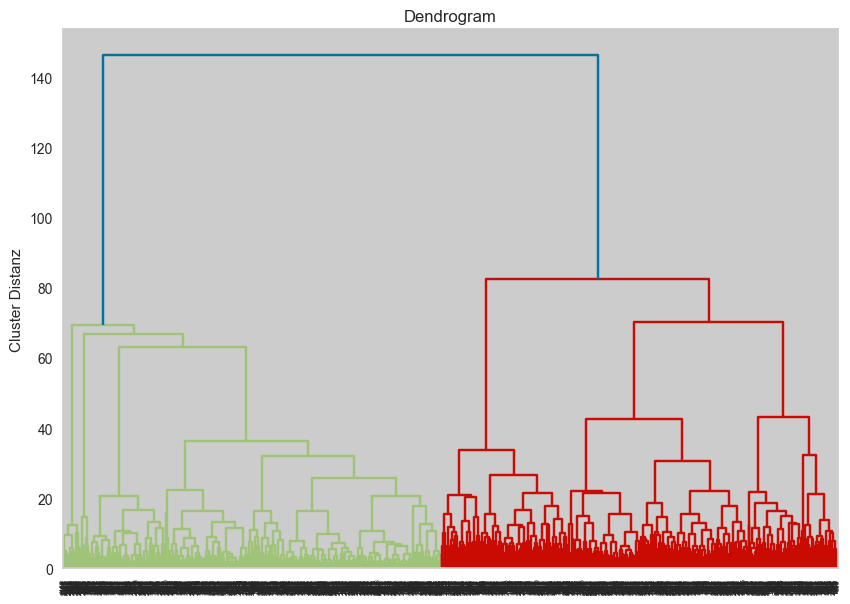

In [61]:
#Erzeugen der Linkage-Matrix
Z = linkage(df_sc, method='ward')

# Dendrogramm zeichnen
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram")
plt.ylabel("Cluster Distanz")
plt.show()

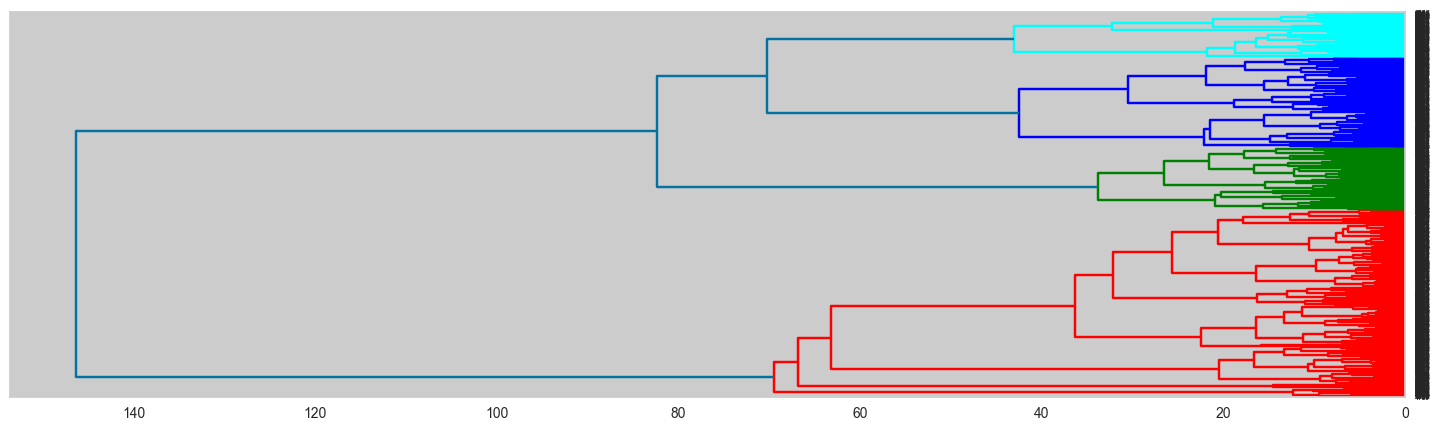

In [62]:
labels = cluster_and_draw(df_sc, 4, 'euclidean', 'ward', 70)
df_sc['cluster']=labels

Es sind auf dem erstenn Blick 4 Cluster zu erkennen an den Dendrogrammen. 3 Cluster sind ungefähr gleich groß verteilt. Ein Cluster ist größer. Würde man den Cut weiter unten sätzen hätte man zu viele relativ kleine Cluster. Dadurch dass das nicht gewollt ist wurde der Cut etwas weiter oben gemacht und gibt damit einen Cluster mit weiteren Distanzen.


 Cluster Ergebnisse: 

| Cluster | Silhouette Score     | Davies-Bouldin Score  |
|---------|----------------------|-----------------------|
| 4      |  0.27752751791053315  | 1.6621982026645272    |
| 5      | 0.30158524043736384   | 1.4657270685645893    |
| 6      | 0.31536375129427474   | 1.329710993347298   |
| 7      | 0.3175746450292205    | 1.2309719902462604    |


In [63]:
silhouette_hac = silhouette_score(df_sc, labels)
davies_bouldin_hac = davies_bouldin_score(df_sc, labels)
print("4 Cluster Score:")
print("HAC Silhouette Score:", silhouette_hac)
print("HAC Davies-Bouldin Score:", davies_bouldin_hac)

4 Cluster Score:
HAC Silhouette Score: 0.23407934277544737
HAC Davies-Bouldin Score: 1.7488994729173806


Die Güte-Werte des HAC-Clusterings fallen für verschiedene Cluster Werte besser aus als die des K-Means. 5 Cluster scheinen nach dem Dendrogram der beste Cut zu sein, um ähnlich große Cluster zu erhalten. Eines ist dabei ein kleineres Cluster, was wieder auf gut isolierbare Kunden zurückzuführen werden könnte.  

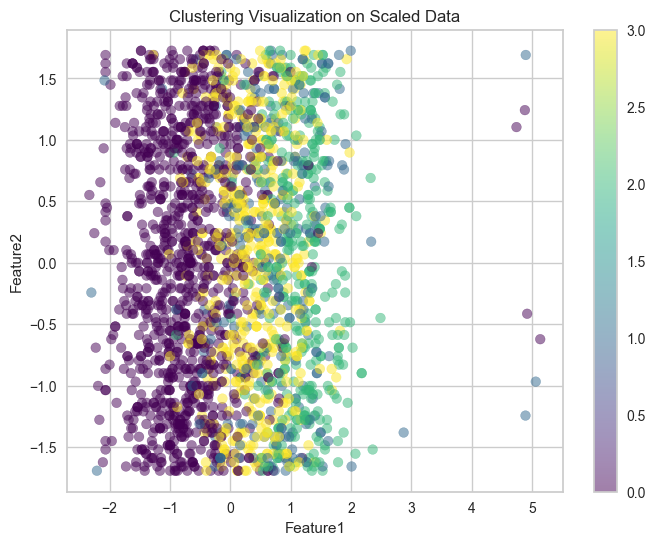

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(df_sc['Income'], df_sc['Recency'], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Clustering Visualization on Scaled Data')
plt.colorbar()
plt.show()

Nach der Anwendung von K-Means und Hierarchischem Agglomerativem Clustering (HAC) auf den Marketing Datenset und der Analyse mittels Silhouette-Scores, Davies-Bouldin sowie Dendrogrammen, zeigten beide Methoden ähnliche Clusterbildungen. Beide Ansätze lieferten vergleichbare Gütemaße, was die Trennschärfe der gebildeten Cluster betrifft. Das HAC-Clustering lieferte jedoch etwas bessere Werte als das K-Means Clustering.

Durch die hohe Dimensionalität ist es ohne Dimensionsreduktion im Allgemeinen schwer, Cluster zu erkennen. Ich werde für die weitere Analyse das HAC
Clustering wählen, da dieses etwas besser performt hat.

##### Dimensionality Reduction:

In [65]:
#Anwendung von PCA auf den Datensatz
pca=PCA()
pca_transformed=pca.fit_transform(df_sc)
pca_components=pd.DataFrame(pca_transformed, index=df_sc.index)
pca_components.round(2)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,4.43,-0.38,-0.53,0.88,-0.12,0.99,-1.01,0.31,0.36,-1.86,...,0.23,1.34,-0.27,-0.14,-0.01,0.80,-0.38,-0.08,-0.0,0.0
1,-2.60,-0.14,-0.74,-1.06,-0.66,0.10,-1.35,1.01,0.79,0.16,...,-0.03,0.29,0.04,0.26,0.29,-0.14,-0.22,0.17,0.0,-0.0
2,2.10,-0.55,-0.52,-0.49,0.27,-0.94,0.59,0.80,0.30,-0.09,...,-0.07,-0.26,-0.47,-1.17,0.36,-0.05,-0.31,0.44,0.0,0.0
3,-2.89,-0.52,-0.98,0.23,-0.32,-0.78,0.83,-0.02,-0.86,0.32,...,-0.04,-0.06,-0.18,0.17,0.29,0.05,0.05,-0.33,0.0,-0.0
4,-0.41,1.33,1.78,-0.14,1.84,0.50,0.44,-1.00,-1.71,0.21,...,-0.16,-0.20,0.11,-0.90,0.12,0.04,-0.17,0.14,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,3.10,-2.12,0.79,0.65,0.86,-0.28,0.40,0.07,0.14,-2.17,...,1.46,0.72,0.92,1.41,-0.15,-0.92,-0.70,-0.49,0.0,0.0
2210,-0.74,1.08,4.09,-0.75,0.04,-0.11,0.33,-0.16,0.77,-0.45,...,0.23,-0.33,0.29,-1.00,0.48,-0.39,-0.26,0.33,-0.0,-0.0
2211,2.01,-0.03,-0.73,0.51,-0.63,1.21,-1.24,-1.34,-0.24,1.25,...,-1.33,-1.44,-0.46,0.64,-0.75,0.33,-0.18,0.25,0.0,0.0
2212,2.25,-1.31,0.57,-0.95,0.16,-1.33,0.59,1.32,0.66,0.76,...,-0.03,0.42,-0.51,-0.09,-0.11,0.42,0.24,-0.13,0.0,-0.0


In [66]:
pca_components.cov().round(2)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,7.98,-0.0,-0.00,-0.00,-0.00,0.00,0.0,0.00,-0.00,-0.00,...,-0.00,-0.00,0.0,0.00,0.00,0.00,-0.00,0.00,0.0,-0.0
1,-0.00,2.3,-0.00,-0.00,0.00,0.00,-0.0,-0.00,-0.00,-0.00,...,0.00,-0.00,0.0,-0.00,0.00,0.00,0.00,-0.00,-0.0,-0.0
2,-0.00,-0.0,2.06,0.00,0.00,0.00,-0.0,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,0.00,0.00,-0.0,0.0
3,-0.00,-0.0,0.00,1.19,0.00,0.00,0.0,0.00,0.00,-0.00,...,-0.00,-0.00,0.0,0.00,0.00,-0.00,-0.00,-0.00,-0.0,-0.0
4,-0.00,0.0,0.00,0.00,1.13,-0.00,-0.0,0.00,-0.00,0.00,...,-0.00,0.00,0.0,-0.00,0.00,0.00,0.00,0.00,-0.0,-0.0
5,0.00,0.0,0.00,0.00,-0.00,1.02,0.0,0.00,0.00,-0.00,...,-0.00,0.00,0.0,0.00,-0.00,-0.00,-0.00,-0.00,-0.0,0.0
6,0.00,-0.0,-0.00,0.00,-0.00,0.00,1.0,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.0,0.00,0.00,-0.00,0.00,-0.00,-0.0,0.0
7,0.00,-0.0,-0.00,0.00,0.00,0.00,-0.0,0.96,-0.00,-0.00,...,0.00,0.00,-0.0,-0.00,-0.00,0.00,0.00,-0.00,0.0,-0.0
8,-0.00,-0.0,-0.00,0.00,-0.00,0.00,-0.0,-0.00,0.87,-0.00,...,0.00,0.00,-0.0,0.00,0.00,0.00,-0.00,-0.00,-0.0,0.0
9,-0.00,-0.0,-0.00,-0.00,0.00,-0.00,-0.0,-0.00,-0.00,0.71,...,0.00,0.00,-0.0,0.00,0.00,-0.00,0.00,0.00,0.0,0.0


Überprüfung der Kovarianzmatrix der PCA-transformierten Daten: 
* Die Hauptdiagonale zeigt die Varianz jeder Komponete 
* Die Nicht-Diagonalelemente sind nahe null
 * D.h. die Komponenten sind unkorreliert

Die Dimensionalität ist aber immer noch hoch und muss reduziert werden. Schauen wir uns dazu die Varianz an: 

[3.38310306e-01 9.74146531e-02 8.75542947e-02 5.03839442e-02
 4.77745011e-02 4.30911471e-02 4.22238326e-02 4.07002546e-02
 3.69654879e-02 3.01298077e-02 2.82589443e-02 2.63993777e-02
 2.17922655e-02 1.83566528e-02 1.75402965e-02 1.67637570e-02
 1.52218020e-02 1.34235536e-02 1.08498525e-02 9.64537314e-03
 7.19989627e-03 1.82706803e-32 1.17223481e-32]
[0.33831031 0.43572496 0.52327925 0.5736632  0.6214377  0.66452885
 0.70675268 0.74745293 0.78441842 0.81454823 0.84280717 0.86920655
 0.89099882 0.90935547 0.92689577 0.94365952 0.95888132 0.97230488
 0.98315473 0.9928001  1.         1.         1.        ]


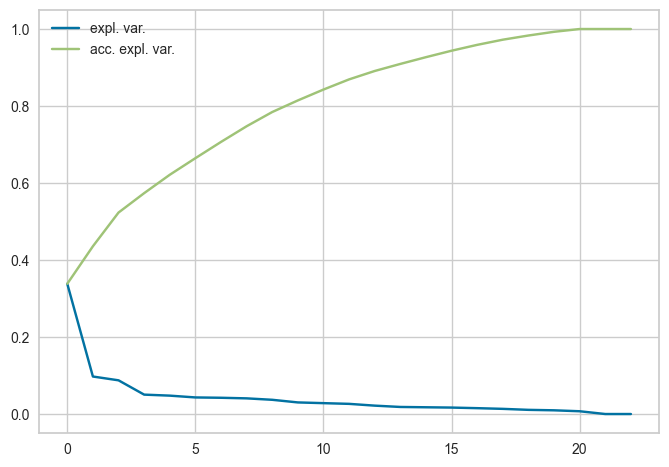

In [67]:
expl_var=pca.explained_variance_ratio_
print(expl_var)
plt.plot(expl_var, label='expl. var.')
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var.')
plt.legend()
print(np.add.accumulate(expl_var))

Häufig wählt man so viele Komponenten, dass 80-90% der Varianz erklärt wird. 
* Die ersten 10 Komponenten umfassen bereits ca. 80% der Varianz. 
* Ab 14 Komponenten werden ca. 90% der Varianz umfasst. 

Vergleicht man verschiedene Komponente mit HAC-Cluster 4, erhält man folgene Ergebnisse:

| Komponente | Silhouette Score    | Davies-Bouldin Score  |
|--------|-------------------------|------------------------|
| 10      |  0.2590781473247198     | 1.2835945067063188     |
| 11      | 0.2074982723300593    | 1.5870485245898007   |
| 12      |  0.20403415632934283    | 1.728450085522802    |
| 13      | 0.18746553247124476    | 1.7599384919623833   |
| 14      | 0.19457431996811672     | 1.7666381376862472    |


Über alle gemessenen Varianzen hinweg scheint Cluster Komponente 10 die besten Gesamtergebnisse zu liefern, mit dem höchsten Silhouette-Score und dem niedrigsten Davies-Bouldin-Score. Es ist gut zu beobachten, dass die Güte schlechter wird, umso mehr Komponenten dazugenommen werden, was zeigt, dass die hohe Dimensionalität einen erhöhten negativen Effekt auf die Güte des Cluters hat. 

Für den weiteren Verlauf wird also die Komponete 10 gewählt, da diese bereits 80% der Varianz abdeckt. 

In [68]:
selected_components = pca_components.iloc[:, :10]

Schauen wir uns nun an ob nach der PCA und Hauptkomponentenauswahl das Dendrogram sich ändert. 

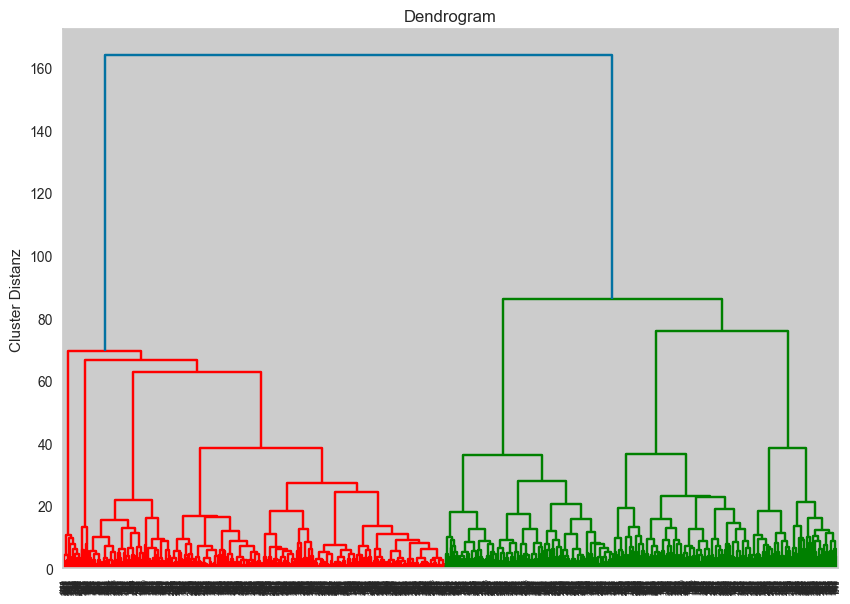

In [69]:
#Erzeugen der Linkage-Matrix
Z = linkage(selected_components, method='ward')

# Dendrogramm zeichnen
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram")
plt.ylabel("Cluster Distanz")
plt.show()

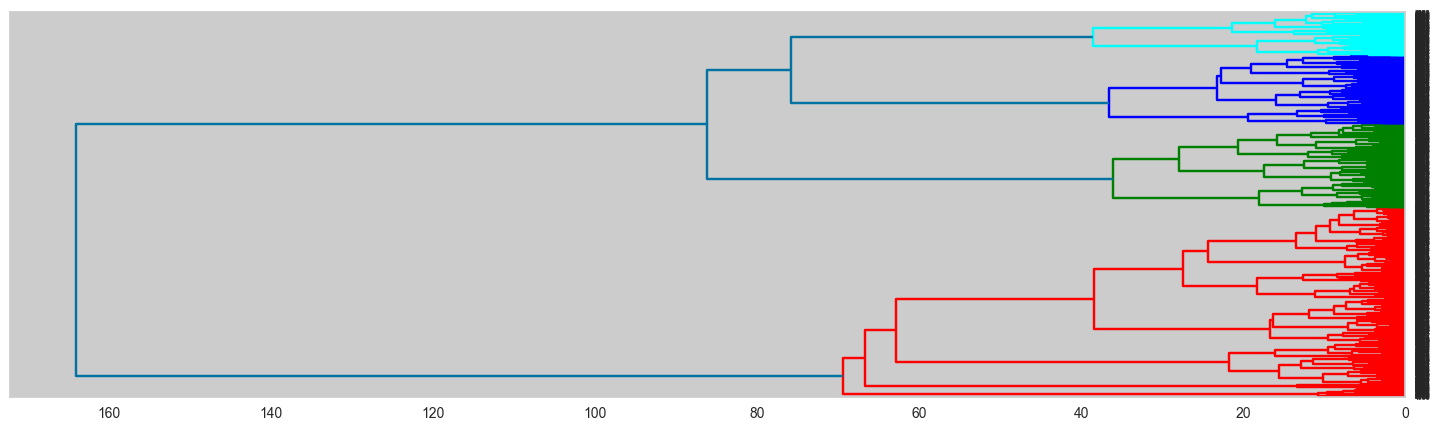

In [70]:
labels = cluster_and_draw(selected_components, 4, 'euclidean', 'ward', 70)
df_sc['cluster']=labels

Die Analyse des Dendrogramms zeigt, dass sich drei ähnlich große Cluster herausbilden. Eines der insgesamt 4 Cluster ist etwas größer mit deutlichen Distanzen. Insbesondere die langen Linien zwischen den Fusionen bei dem Cluster deuten auf eine deutliche Distanz zwischen dem Clustern hin. Eine Trennung weiter unten würde zu sehr kleinen Kundenclustern führen. Der Kunde möchte aber größere Kunden-Gruppen Marketingkampagnen starten, weshalb mein Blickwinkel auf größeren Clustern liegt.

Endcluster:

PCA-based HAC Silhouette Score: 0.2695039138961186
PCA-based HAC Davies-Bouldin Score: 1.375202355956606


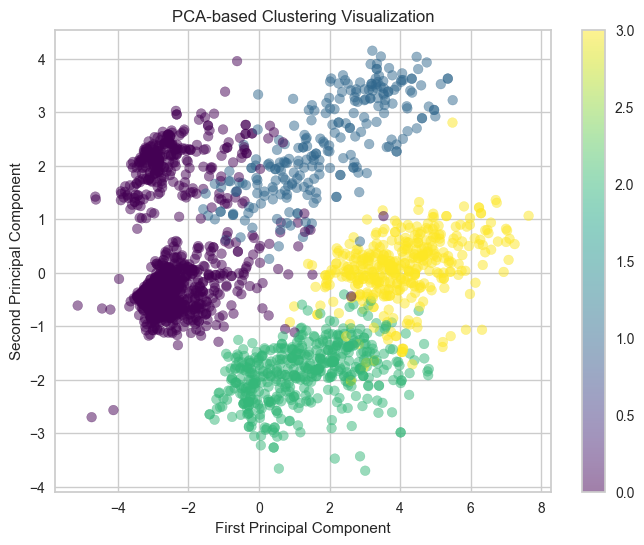

In [71]:
#Clustering auf den PCA-transformierten Daten
agg = AgglomerativeClustering(n_clusters=4, linkage='ward') 
labels = agg.fit_predict(selected_components) 

#Gütemaße berechnen
silhouette_pca = silhouette_score(selected_components, labels)
davies_bouldin_pca = davies_bouldin_score(selected_components, labels)

print("PCA-based HAC Silhouette Score:", silhouette_pca)
print("PCA-based HAC Davies-Bouldin Score:", davies_bouldin_pca)

plt.figure(figsize=(8, 6))
plt.scatter(selected_components.iloc[:, 0], selected_components.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA-based Clustering Visualization')
plt.colorbar()
plt.show()

##### Beobachtungen: 

* Das sieht schon einmal viel besser aus als vor der PCA! Es sind diesmal Cluster zu erkennen. 
* Das blaue Cluster ist leider nicht wirklich verdichtet im Gegensatz zum gelben und grünen Cluster. Das könnte auch Noise sein statt ein Cluster.
* Das lilane Cluster ist zwar gut verdichtet, aber das sieht eher wie zwei einzelne Cluster aus, die von dem Modell als eines interpretiert wird, egal wie hoch ich die Clusteranzahl erhöhe. 

Fazit zu Task 6 Cluster: 
 * Die Cluster Bildung sieht komplett anders aus. Ohne Dimensionsreduktion in Aufgabe 6 war es sehr schwer Cluster in der Viszalisierung zu erkennen, da die Punkte alle beieinander waren, weshalb auch ein Pairplot am Anfang nichts gebracht hat, da nichts zu erkennen war. Durch die Reduzierung der Dimensionalität und Wahl der von Komponenten bis zu einer Varianz von 80% war es möglich verwendbare Cluster zu bilden. 


##### Cluster Interpretation:

Ich wähle das Clustering-Ergebnis aus Aufgabe 7, da durch die hohe Dimensionalität in Aufgabe 6 keine Cluster identifizierbar waren. Außerdem verbessern sich die Clusterergebnisse durch die Anwendung von PCA und Dimensionalitätsreduktion.

In [72]:
#Alle Spalten anzeigen im Pandas Dataframe
pd.set_option('display.max_columns', None)

#https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe

In [73]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = agg.fit_predict(selected_components)  # PCA-transformierte Daten

#Cluster-Labels zum ursprünglichen DataFrame hinzufügen
df['Cluster'] = labels

#Statistische Zusammenfassung für jedes Cluster berechnen
cluster_summary = df.groupby('Cluster').agg(['mean'])
cluster_summary

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Is_Couple,Has_Child,AcceptedCamp_all,TotalSpending,Educational_Level_High,Educational_Level_Low,Educational_Level_Middle
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster,,,,,,,,,,,,,,,,,,,,,,
0,36293.936929,48.529250,59.690128,6.068556,28.747715,9.383912,6.305302,16.104205,2.053931,2.306216,0.697441,3.482633,6.313528,0.019196,53.135283,0.663620,0.859232,0.176417,126.299817,0.213894,0.04936,0.736746
1,68763.223577,50.191057,693.760163,34.943089,299.520325,45.951220,35.589431,50.747967,2.524390,6.081301,4.983740,8.170732,4.361789,0.000000,58.479675,0.577236,0.528455,0.873984,1160.512195,1.000000,0.00000,0.000000
2,58890.184647,49.392116,425.311203,32.186722,155.840249,41.958506,33.192946,70.074689,3.811203,6.423237,3.221992,7.771784,5.711618,0.000000,57.095436,0.701245,0.973029,0.321577,758.564315,0.000000,0.00000,1.000000
3,76590.107143,49.255102,597.839286,70.147959,482.744898,105.864796,71.885204,84.982143,1.119898,4.926020,6.045918,8.372449,2.670918,0.000000,55.790816,0.566327,0.109694,1.096939,1413.464286,0.000000,0.00000,1.000000


In [74]:
#Anzahl der unterschiedlichen Cluster
df['Cluster'].value_counts()

Cluster
0    1094
2     482
3     392
1     246
Name: count, dtype: int64

Cluster 0 ist das größte Cluster mit 1094 Kunden. Die restlichen drei Cluster sind etwa gleich groß. Cluster 0 ist vermutlich das Cluster, das sich in viele kleine Cluster aufgesplittet hätte, wie im Dendrogramm zu erkennen war.

Cluster 0: 
 * Diese Kundengruppe verdient durchschnittlich am wenigsten.
 * Der Bildungsstand tendiert eher zu geringem bis mittlerem Bildungsstand.
 * Diese Kundengruppe gibt durchschnittlich am wenigsten aus.
 * Kaufen am wenigsten in jeder Kategorie.
 * Die Kunden sind eher in einer Partnerschaft und haben Kinder.
 * Akzeptieren Kampagnen sehr selten bis gar nicht.
 * Sind oft auf der Website unterwegs, kaufen jedoch selten.
 
Cluster 1:
 * Diese Kundengruppe hat durchschnittlich ein hohes Einkommen.
 * Der Bildungsstand ist hoch.
 * Diese Kundengruppe gibt durchschnittlich sehr viel aus.
 * Geben vor allem in den Kategorien Wein und Fisch sehr viel aus.
 * "Is_Couple" und "Has_Child" zeigen eine ausgeglichene Verteilung mit etwa 0.5.
 * Diese Kunden akzeptieren Kampagnen gerne.
 * Kaufen vor allem im Store, aber auch gerne online und im Katalog. Nehmen auch Deals an.
 
Cluster 2: 
* Diese Kundengruppe verdient etwas mehr als das Gesamtdurchschnittseinkommen (52.247,25).
* Der Bildungsstand ist mittel.
* Diese Kundengruppe gibt etwas mehr als den Gesamtdurchschnitt aus.
* Geben in jeder Kategorie etwas mehr als der Durchschnitt aus, außer bei Goldprodukten, bei denen diese Kundengruppe sehr viel ausgibt.
* Diese Kunden sind in einer Partnerschaft und haben Kinder.
* Akzeptieren Kampagnen eher weniger.
* Kaufen sehr gerne online und im Store ein und nehmen sehr gerne Deals an.

Cluster 3: 
* Diese Kundengruppe verdient durchschnittlich sehr viel.
* Der Bildungsstand ist mittel.
* Diese Kundengruppe gibt sehr viel aus.
* Kaufen am meisten in jeder Kategorie.
* "Is_Couple" zeigt eine ausgeglichene Verteilung. Diese Kunden haben jedoch keine Kinder.
* Diese Kunden akzeptieren Kampagnen gerne.
* Kaufen vor allem im Store und im Katalog ein. Nehmen keine Deals an.

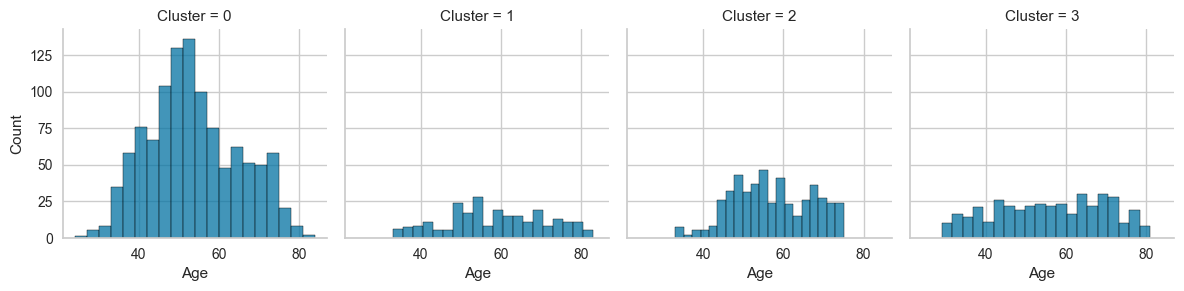

In [75]:
#Histogramme für das Alter in jedem Cluster
visual = sns.FacetGrid(df, col='Cluster', col_wrap=4, height=3)
visual.map(sns.histplot, 'Age', bins=20)
plt.subplots_adjust(top=0.9)
plt.show()

###### Quelle: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html & https://seaborn.pydata.org/tutorial/axis_grids.html

Das Alter aller Cluster ist durchschnittlich, was bedeutet, dass diese ausgeglichen verteilt sind, wie an der Visualisierung erkennbar. Cluster 0 ist eine Ausnahme, da es im mittleren Bereich von ca. 45-55 Jahren mehr Kunden enthält.

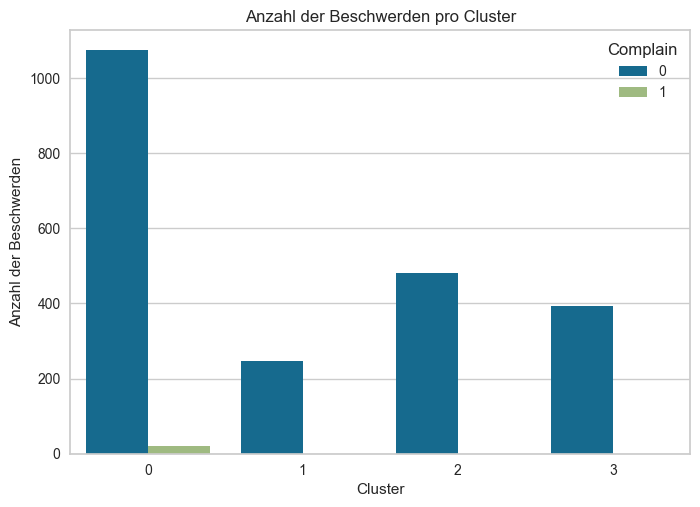

In [76]:
#Bar Plots zu den Beschwerden
sns.countplot(x='Cluster', hue='Complain', data=df)
plt.title('Anzahl der Beschwerden pro Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anzahl der Beschwerden')
plt.legend(title='Complain')
plt.show()

Nur in Cluster 0 haben sich Kunden beschwert. Das ist auch das Cluster, das insgesamt am wenigsten Profit für das Unternehmen bringt, gleichzeitig aber die größte Kundengruppe ist, was beachtet werden muss. Diese Gruppe hat wohl einige Kunden, die unzufrieden sind. Man sollte versuchen, diese Kunden zufriedenzustellen und möglicherweise damit zu höheren Käufen zu bewegen durch Kundenzufriedenheit.

##### Conclusions and Future Work:

**Ergebnisse zusammenfassen und interpretieren:**
- **Cluster 0:** Kunden mit dem niedrigsten Einkommen, geringem bis mittlerem Bildungsstand. Diese Kunden geben am wenigsten aus, sind jedoch die größte Gruppe.
- **Cluster 1:** Kunden mit hohem Einkommen und hohem Bildungsstand. Diese Gruppe gibt viel aus, insbesondere für Wein und Fisch, und akzeptiert gerne Kampagnen.
- **Cluster 2:** Kunden mit überdurchschnittlichem Einkommen und mittlerem Bildungsstand. Diese Kunden geben etwas mehr aus als der Durchschnitt und bevorzugen Goldprodukte.
- **Cluster 3:** Kunden mit sehr hohem Einkommen und mittlerem Bildungsstand. Diese Gruppe gibt am meisten aus und akzeptiert gerne Kampagnen.

**Interpretation:**
- Die Clusterbildung zeigt unterschiedliche Kundensegmente mit spezifischen Ausgabemustern und Reaktionen auf Marketingkampagnen. Die größte Gruppe, Cluster 0, hat das niedrigste Einkommen und die geringsten Ausgaben, während Cluster 3 die höchsten Ausgaben und das höchste Einkommen aufweist.

**Vergleich der Ergebnisse mit den erwarteten oder gewünschten Ergebnissen aus dem ursprünglichen Plan:**
- **Erwartete Ergebnisse:** Identifikation von Kundensegmenten basierend auf Einkommen, Ausgaben und Reaktionen auf Marketingkampagnen.
- **Erzielte Ergebnisse:** Die Clusteranalyse hat erfolgreich verschiedene Kundensegmente identifiziert, die den Erwartungen entsprechen. Jedes Cluster zeigt spezifische Ausgabemuster und demografische Merkmale, die zur Segmentierung verwendet werden können.

**Erklären des erzeugten Werts:**
- **Wert für die Organisation:** Die Clusteranalyse bietet der Organisation wertvolle Einblicke in verschiedene Kundengruppen. Diese Informationen können genutzt werden, um gezielte Marketingstrategien zu entwickeln, die auf die spezifischen Bedürfnisse und Vorlieben der einzelnen Segmente zugeschnitten sind. Beispielsweise können Kampagnen für Cluster 1 und Cluster 3 intensiver beworben werden, da diese Gruppen eher geneigt sind, Kampagnen zu akzeptieren und höhere Ausgaben zu tätigen.

**Empfehlung eines Handlungsplans:**
- **Cluster 0:** Entwickeln von Maßnahmen zur Kundenzufriedenheit, um die Ausgaben dieser großen Gruppe zu erhöhen. Eventuell könnten gezielte Rabatte oder exklusive Angebote die Ausgaben anregen.
- **Cluster 1:** Fortsetzung und Intensivierung von Marketingkampagnen, insbesondere für Wein und Fisch. Diese Gruppe ist bereits empfänglich für Kampagnen und zeigt hohe Ausgaben.
- **Cluster 2:** Fokus auf Goldprodukte und Online-Shopping-Erlebnisse. Diese Kunden reagieren gut auf Deals und kaufen gerne online und im Store ein. D.h. die Website auszubauen wäre ratsam.
- **Cluster 3:** Entwicklung von High-End-Angeboten und exklusiven Kampagnen, um diese zahlungskräftige Gruppe weiter zu binden. Diese Kunden akzeptieren gerne Kampagnen und geben in allen Kategorien viel aus.

**Reflexion über Einschränkungen und mögliche Fallstricke:**
- **Einschränkungen:** Die Analyse basiert auf historischen Daten, die möglicherweise nicht die aktuellen Trends widerspiegeln. Änderungen im Marktverhalten oder neue Konkurrenten könnten die Relevanz der Ergebnisse beeinflussen.
- **Mögliche Fallstricke:** Die Clusteranalyse könnte übermäßige Vereinfachungen enthalten und individuelle Unterschiede innerhalb der Cluster nicht ausreichend berücksichtigen. Es besteht auch die Gefahr, dass Kunden in dem größeren Cluster vernachlässigt werden.

**Kritische Diskussion der angewandten Methodik:**
- **Wahl der Methoden:** Die Verwendung von PCA zur Dimensionsreduktion und HAC für die Clusterbildung waren sinnvoll, um die Komplexität zu reduzieren und klare Cluster zu identifizieren.
- **Verbesserungsvorschläge:** Es hätte auch hilfreich sein können, alternative Clustering-Methoden wie DBSCAN auszuprobieren, um potenzielle Ausreißer besser zu identifizieren. Denn die Cluster-Ergebnisse in Aufgabe 7 haben klare Ausreißer angezeigt. Ich habe zwei Algorithmen verwendet, die nicht gut auf Ausreißer reagieren, was vielleicht nicht die beste Idee war. Denn dadurch hat man nicht den Vergleich ob Methoden die  besser auf Ausreißer reagieren bessere Erebnisse bringen würden. 
Eine gründlichere Hyperparameter-Optimierung könnte die Ergebnisse weiter verbessern.
- **Weitere Ansätze:** Eine Kombination von verschiedenen Dimensionsreduktionstechniken (z.B. PCA und t-SNE) könnte zusätzliche Einblicke bieten.

**Vorschläge für zukünftige Arbeiten:**
- **Alternative Clustering-Methoden:** Testen von Algorithmen wie DBSCAN oder OPTICS, um die Robustheit der Clusterergebnisse zu erhöhen. Diese Methoden sind besonders gut in der Lage, Ausreißer (Noise) zu identifizieren und zu eliminieren sowie Cluster beliebiger Form zu erkennen. Dadurch, dass es Probleme mit Ausreißern gab in den Clustern bieten sich diese Algorithmen gut an.
- **Zeitanalysen:** Durchführung von Analysen über verschiedene Zeiträume hinweg, um Veränderungen im Kundenverhalten zu erkennen und langfristige Trends zu identifizieren.
- **Alternative Dimensionsreduktionstechniken ausprobieren:** PCA vs. t-SNE vs. UMAP. t-SNE ist besonders gut für die Visualisierung von hochdimensionalen Daten, während UMAP schneller als t-SNE ist und gut für größere Datensätze geeignet ist.

###### (https://blog.bioturing.com/2022/01/14/umap-vs-t-sne-single-cell-rna-seq-data-visualization/ & https://www.hackersrealm.net/post/dimensionality-reduction-machine-learning-python)